In [249]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

dataframes column'names are taken from the `README.md` file in the dataset

In [250]:
# display full numbers separated with spaces instead of scientific notation
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x).replace(",", " "))
pd.reset_option('display.float_format')

## Characters

In [251]:
characters_df = pd.read_csv("data/processed_characters.csv")


In [252]:
characters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440622 entries, 0 to 440621
Data columns (total 8 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Freebase movie ID                440622 non-null  object 
 1   Movie release date               440622 non-null  int64  
 2   Actor date of birth              335384 non-null  float64
 3   Actor gender                     430966 non-null  object 
 4   Actor ethnicity (Freebase ID)    102839 non-null  object 
 5   Actor name                       439414 non-null  object 
 6   Freebase character/actor map ID  440622 non-null  object 
 7   Freebase actor ID                439822 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 26.9+ MB


In [253]:
characters_df.describe()

Movie release date  Actor date of birth
count       440622.000000        335384.000000
mean          1984.530566          1943.059827
std             25.245842            34.095926
min           1900.000000            19.000000
25%           1969.000000          1923.000000
50%           1994.000000          1948.000000
75%           2005.000000          1966.000000
max           2016.000000          9900.000000

In [254]:
print("percentage of NaNs per columns")
characters_df.isna().mean() * 100

percentage of NaNs per columns


Freebase movie ID                   0.000000
Movie release date                  0.000000
Actor date of birth                23.883964
Actor gender                        2.191448
Actor ethnicity (Freebase ID)      76.660494
Actor name                          0.274158
Freebase character/actor map ID     0.000000
Freebase actor ID                   0.181562
dtype: float64

In [255]:
characters_df.sample(10)

Freebase movie ID  Movie release date  Actor date of birth  \
195871        /m/0j_3jy2                1959               1913.0   
204104        /m/0bdpdbn                2010               1965.0   
343451         /m/094sw8                2004               1977.0   
390274         /m/0fn4s2                1983                  NaN   
205807        /m/026gfzz                1912               1888.0   
18022         /m/0dgnpwm                2005                  NaN   
434737         /m/0cr0_l                1978               1945.0   
317317        /m/05c0t12                1950               1896.0   
304763        /m/07kgxk5                1980               1950.0   
220940        /m/07ykkx5                2010                  NaN   

       Actor gender Actor ethnicity (Freebase ID)               Actor name  \
195871            M                           NaN               Gert Fröbe   
204104            M                           NaN             James DuMont   
343451            M                           NaN         Mauricio Ochmann   
390274            M                           NaN            Pierre Novion   
205807            F                           NaN        Florence La Badie   
18022             M                           NaN            Paul Eenhoorn   
434737            F                     /m/022fdt         Adrienne Barbeau   
317317            M                           NaN     Kazimierz Wilamowski   
304763            M                           NaN                Ed Harris   
220940            F                           NaN  Stephanie Leigh Schlund   

       Freebase character/actor map ID Freebase actor ID  
195871                      /m/0mzqb4p         /m/01tj5w  
204104                      /m/0bdpdsh        /m/0408yvx  
343451                       /m/0jsml3         /m/094s31  
390274                      /m/0gcn_fl        /m/0gc0qzr  
205807                      /m/0ggd89h         /m/01969m  
18022                       /m/0gb036x        /m/0bmbnv3  
434737                      /m/02tb6tk         /m/01z7nj  
317317                      /m/0mwv43t        /m/0mwv43x  
304763                      /m/0gd2xfy         /m/017149  
220940                      /m/07ykl2t        /m/07ykl33

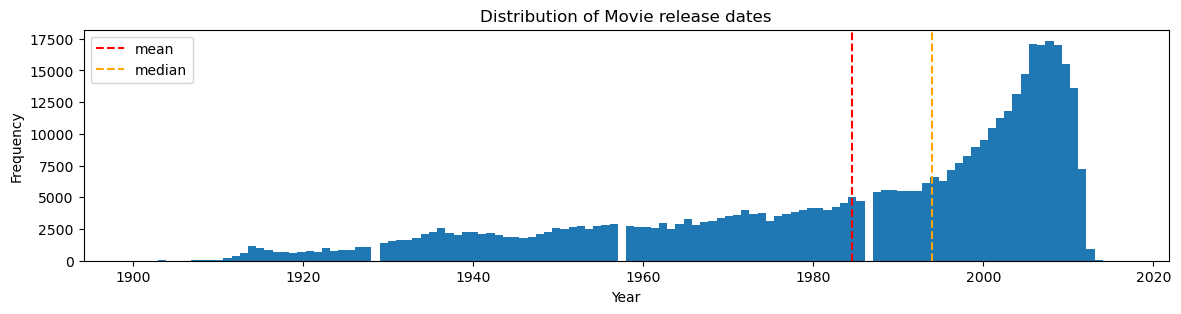

In [256]:
movie_dates = characters_df['Movie release date'].astype(int) #pd.to_datetime(characters_df['Movie release date'], errors='coerce').dt.year
plt.figure(figsize=(14,3))
plt.hist(movie_dates, bins=2020-1900)  
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Movie release dates')
plt.axvline(movie_dates.mean(), linestyle="--", color="red", label="mean")
plt.axvline(movie_dates.median(), color="orange", label="median", linestyle="--")
plt.legend()
plt.show()

<Axes: title={'center': 'Actor age at movie release'}, xlabel='Age', ylabel='Frequency'>

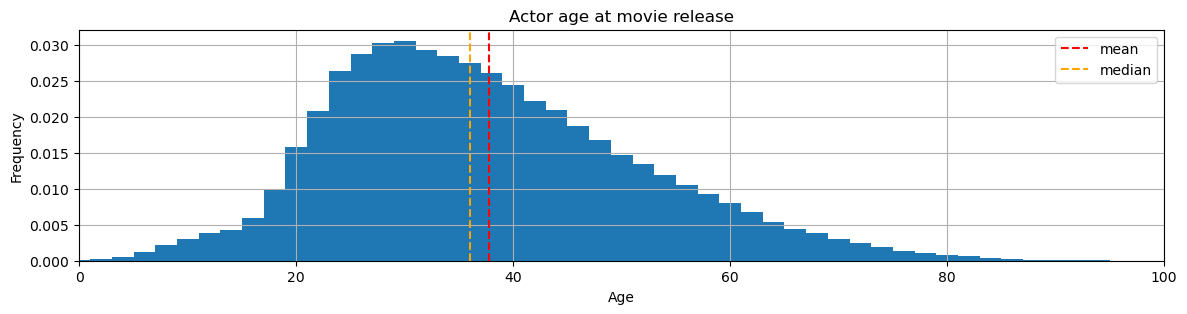

In [257]:
characters_df_noproccessed = pd.read_csv("data/character.metadata.tsv", delimiter="\t", header=None)
characters_df_noproccessed.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", "Actor date of birth", "Actor gender", "Actor height (in meters)", "Actor ethnicity (Freebase ID)", "Actor name", "Actor age at movie release", "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"]

plt.figure(figsize=(14,3))
plt.title("Actor age at movie release")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0,100)
plt.axvline(characters_df_noproccessed["Actor age at movie release"].mean(), linestyle="--", color="red", label="mean")
plt.axvline(characters_df_noproccessed["Actor age at movie release"].median(), color="orange", label="median", linestyle="--")
plt.legend()
characters_df_noproccessed["Actor age at movie release"].hist(bins=4000, density=True)

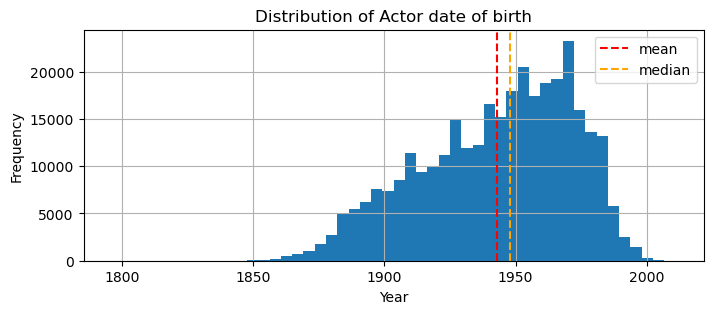

In [258]:

actor_dates = pd.to_datetime(characters_df_noproccessed['Actor date of birth'], errors='coerce').dt.year

plt.figure(figsize=(8,3))
plt.hist(actor_dates, bins=50)  
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Actor date of birth')

plt.axvline(actor_dates.mean(), linestyle="--", color="red", label="mean")
plt.axvline(actor_dates.median(), color="orange", label="median", linestyle="--")
plt.legend()
plt.grid()

plt.show()


<Axes: xlabel='Actor gender'>

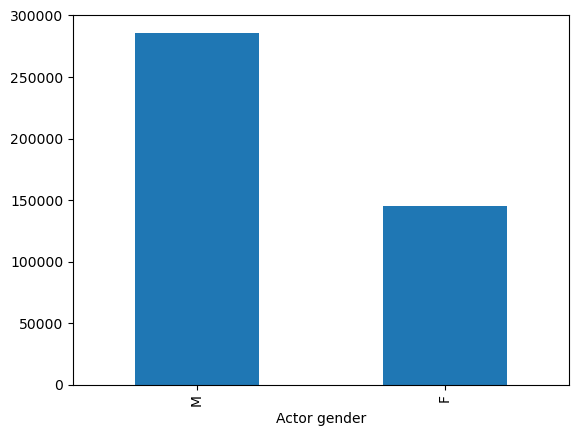

In [259]:
characters_df["Actor gender"].value_counts().plot(kind="bar")

# Movies

## Genres

In [260]:
from collections import Counter

In [261]:
periods_map = {
    "The Belle Époque (1900-1914)": {"start_year": 1900, "end_year": 1913},
    "World War I (1914-1918)": {"start_year": 1914, "end_year": 1919},
    "The Roaring Twenties (1920-1929)": {"start_year": 1920, "end_year": 1928},
    "The Great Depression (1929-1939)": {"start_year": 1930, "end_year": 1939},
    "World War II (1939-1945)": {"start_year": 1940, "end_year": 1946},
    "Early Cold War (1947-1960)": {"start_year": 1947, "end_year": 1960},
    "The Civil Rights Movement (1960-1970)": {"start_year": 1961, "end_year": 1970},
    "Late Cold War (1971-1989)": {"start_year": 1971, "end_year": 1989},
    "End of the Cold War (1990-1991)": {"start_year": 1990, "end_year": 1991},
    "Post-Cold War and the New World Order (1992-2001)": {"start_year": 1992, "end_year": 2000},
    "War on Terrorism (2001-present)": {"start_year": 2001, "end_year": 2024},
}


def map_year_to_periods(year, periods):
    matching_periods = []
    for period, years in periods.items():
        if years['start_year'] <= year <= years['end_year']:
            matching_periods.append(period)
    if matching_periods:
        return matching_periods
    else:
        return ["Year not in any defined period"]
    
# Sort the periods based on their start year
sorted_periods = sorted(periods_map.items(), key=lambda x: x[1]['start_year'])
# Create a mapping from period name to its position in the timeline
period_order_map_dict = {period[0]: idx for idx, period in enumerate(sorted_periods)}

periods_events_map = {
    "The Belle Époque (1900-1914)": [
        "third_Great_Awakening", 
        "economic_prosperity", 
        "segregation"
    ],
    "World War I (1914-1918)": [
        "segregation", 
        "WWI"
    ],
    "The Roaring Twenties (1920-1929)": [
        "economic_euphoria", 
        "industrial_expansion", 
        "cultural_change", 
        "rise_of_women's_rights", 
        "stock_market_boom", 
        "prohibition"
    ],
    "The Great Depression (1929-1939)": [
        "1929_stock_market_crash", 
        "mass_unemployment", 
        "New_Deal_reforms"
    ],
    "World War II (1939-1945)": [
        "military_production_recovery", 
        "U.S._contribution_to_Allies", 
        "new_technologies", 
        "United_Nations", 
        "WWII"
    ],
    "Early Cold War (1947-1960)": [
        "capitalist_vs_communist_blocs", 
        "internal_political_repression", 
        "Korean_War", 
        "Cuban_Missile_Crisis", 
        "space_race"
    ],
    "The Civil Rights Movement (1960-1970)": [
        "civil_rights_movements", 
        "Martin_Luther_King_Jr.", 
        "Civil_Rights_Act", 
        "Voting_Rights_Act", 
        "women's_and_LGBTQ+_rights"
    ],
    "Late Cold War (1971-1989)": [
        "Vietnam_War", 
        "arms_race", 
        "new_technologies"
    ],
    "End of the Cold War (1990-1991)": [
        "fall_of_the_Soviet_Union", 
        "technological_advancements", 
        "Gulf_War"
    ],
    "Post-Cold War (1992-2001)": [
        "internet_development", 
        "1990s_economic_boom"
    ],
    "War on Terrorism (2001-present)": [
        "september_11th_attacks", 
        "War_on_Terror", 
        "Patriot_Act", 
        "Iraq_War", 
        "2008_financial_crisis", 
        "geopolitical_tensions"
    ]
}

In [262]:
# Load data
processed_movies_df = pd.read_csv("data/processed_movies.csv")
movies_df = processed_movies_df[['Movie name', 'Movie release date', 'Movie genres']]

Filter the movies dataset. We only keep the movies released after 1900 and from the USA.

In [263]:
movies_df.loc[:, 'Periods'] = movies_df['Movie release date'].apply(map_year_to_periods, periods=periods_map)
movies_df['Periods'].head(10)

/var/folders/tj/z0dp280955b2cclgs13c8ngm0000gn/T/ipykernel_36828/3430741218.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0                    [War on Terrorism (2001-present)]
1    [Post-Cold War and the New World Order (1992-2...
2                       [The Belle Époque (1900-1914)]
3                   [The Great Depression (1929-1939)]
4                   [The Great Depression (1929-1939)]
5    [Post-Cold War and the New World Order (1992-2...
6              [The Civil Rights Movement (1960-1970)]
7    [Post-Cold War and the New World Order (1992-2...
8                   [The Great Depression (1929-1939)]
9    [Post-Cold War and the New World Order (1992-2...
Name: Periods, dtype: object

In [264]:
movies_df_copy = movies_df.copy()

# Casefolding all the strings of column "Movie genres" the Data Frame
movies_df_copy['Movie genres'] = movies_df_copy['Movie genres'].apply(lambda x: x.casefold() if isinstance(x, str) else x)

# Transform string into a list of strings (word = genre)
def clean_genres(x):
    # If the value is a string (which contains the genres), clean it
    if isinstance(x, str):
        str_to_list = [genre.strip("'") for genre in x.strip("[]").split(", ")]
        #str_to_list = [genre for genre in str_to_list if genre not in unwanted_genres]
        return str_to_list if str_to_list else None
    # If it's already a list, return it as is
    elif isinstance(x, list):
        return x
    else:
        genres = []
    # Remove the row if the list is empty
    return genres if genres else None


# Clean the genres
movies_df_copy['Movie genres'] = movies_df_copy['Movie genres'].apply(clean_genres)

movies_df_copy['Movie genres']

0        [thriller, science fiction, horror, adventure,...
1         [mystery, biographical film, drama, crime drama]
2        [short film, silent film, indie, black-and-whi...
3                       [musical, comedy, black-and-white]
4                                 [drama, black-and-white]
                               ...                        
33197                          [parody, americana, comedy]
33198    [thriller, erotic thriller, psychological thri...
33199                 [comedy film, romance film, musical]
33200                                              [drama]
33201                                     [satire, comedy]
Name: Movie genres, Length: 33202, dtype: object

In [265]:
# This cell is just useful to rank the occurences of the genres and map the top 50 to one of the 10 themes

unique_genres = [genre for sublist in movies_df_copy['Movie genres'] for genre in sublist]

themes_counts_years = Counter(unique_genres)

# Sort the Counter dictionary by value in descending order
sorted_genre_counts = dict(sorted(themes_counts_years.items(), key=lambda item: item[1], reverse=True))

print(sorted_genre_counts)

{'drama': 12995, 'comedy': 9472, 'black-and-white': 6018, 'indie': 5413, 'thriller': 4851, 'short film': 4688, 'action': 4446, 'romance film': 4439, 'crime fiction': 3571, 'silent film': 3240, 'action/adventure': 3077, 'adventure': 2986, 'horror': 2965, 'documentary': 2702, 'family film': 2626, 'science fiction': 1885, 'western': 1824, 'mystery': 1816, 'romantic comedy': 1791, 'musical': 1678, 'animation': 1632, 'crime thriller': 1459, 'fantasy': 1422, 'romantic drama': 1407, 'war film': 1198, 'film adaptation': 1131, 'comedy-drama': 1066, 'period piece': 1037, 'biography': 959, 'comedy film': 940, 'psychological thriller': 931, 'sports': 806, 'teen': 789, 'television movie': 779, 'parody': 754, '"children\'s/family"': 733, 'black comedy': 667, 'family drama': 633, 'biographical film': 608, 'cult': 605, 'slasher': 598, 'suspense': 597, 'lgbt': 597, 'coming of age': 588, 'music': 573, 'film noir': 541, 'slapstick': 529, 'culture & society': 509, 'melodrama': 463, 'history': 454, 'supern

In [266]:
# Clearer to put it this way: theme and its corresponding genres
theme_mapping = {
    'Action/Adventure/Thriller': ['action', 'thriller', 'adventure', 'fantasy adventure', 'action comedy', 'action thrillers', 'spy', 'martial arts film', 'epic', 'road movie', 'action/adventure', 'adventure comedy', 'war film', 'military drama', 'combat film', 'anti-war film', 'political thriller', 'war film', 'military drama', 'combat film', 'western'],
    'Comedy': ['comedy', 'romantic comedy', 'black comedy', 'slapstick', 'comedy-drama', 'comedy film', 'adventure comedy', 'screwball comedy', 'fantasy comedy', 'domestic comedy', 'comedy of manners', 'sex comedy', 'comedy of errors'],
    'Drama/Mystery': ['drama', 'family drama', 'melodrama', 'crime drama', 'political drama', 'comedy-drama', 'marriage drama', 'courtroom drama', 'historical fiction', 'political cinema', 'social issues', 'crime comedy', 'mystery', 'detective', 'detective fiction'],
    'Romance': ['romance film', 'romantic comedy', 'romantic drama', 'romantic fantasy'],
    'Horror/Crime': ['crime fiction', 'crime thriller', 'gangster film', 'detective', 'detective fiction', 'crime drama', 'b-movie', 'heist', 'horror', 'slasher', 'psychological thriller', 'zombie film', 'horror comedy', 'monster movie', 'natural horror films', 'suspense'],
    'Science Fiction/Fantasy': ['science fiction', 'fantasy', 'superhero movie', 'sci-fi horror', 'superhero', 'fantasy comedy'],
    'Animation/Family': ['animation', 'animated cartoon', 'computer animation', 'animated musical', 'family', 'teen', '"children\'s/family"', '"children\'s"', 'family-oriented adventure', "children\'s fantasy"],
    'Historical/Biographical/Documentary': ['documentary', 'docudrama', 'rockumentary', 'concert film', 'mockumentary', 'period piece', 'historical drama', 'biography', 'history', 'biographical film', 'historical fiction'],
    'Short/Silent': ['short film', 'silent film'],
    'Black-and-White': ['black-and-white'], 
    'Independent/Experimental/LGBT': ['indie', 'experimental film', 'lgbt', 'gay', 'gay themed', 'gay interest'],
    'Musical': ['musical', 'musical drama', 'musical comedy'],
    'Other': []
}


# Inverting the theme_mapping to map genres to themes
genre_to_theme_mapping = {
    genre: theme
    for theme, genres in theme_mapping.items()
    for genre in genres
}

# Function to map genres to themes
def map_genres_to_themes(genres, mapping):
    if isinstance(genres, list):
        themes = set()
        for genre in genres:
            if genre in mapping:
                themes.add(mapping[genre])
            else:
                themes.add('Other')
        return themes
    elif isinstance(genres, str):
        if genres in mapping:
            return {mapping[genres]}
        else:
            return {'Other'}
    return None

movies_df_copy['Themes'] = movies_df_copy['Movie genres'].apply(lambda genres: map_genres_to_themes(genres, genre_to_theme_mapping))

# Drop rows where Themes is NaN or empty
movies_df_copy = movies_df_copy.dropna(subset=['Themes'])

movies_df_copy['Themes'].head()

0    {Horror/Crime, Action/Adventure/Thriller, Othe...
1    {Horror/Crime, Drama/Mystery, Historical/Biogr...
2    {Black-and-White, Comedy, Short/Silent, Indepe...
3                   {Black-and-White, Comedy, Musical}
4                     {Black-and-White, Drama/Mystery}
Name: Themes, dtype: object

In [267]:
# Prepare the data for the plots
movies_df_copy_exploded = movies_df_copy.explode('Themes')
themes = list(theme_mapping.keys())

In [268]:
# Define a color palette for the themes so they are assigned the same color for all plots

custom_colors = [
    "#e41a1c",  # Red - Action/Adventure/Thriller
    "#377eb8",  # Blue - Comedy
    "#4daf4a",  # Green - Drama
    "#ff7f00",  # Orange - Romance
    "#984ea3",  # Purple - Crime
    "#ffff33",  # Yellow - Science Fiction/Fantasy
    "#a65628",  # Brown - Historical/Biographical
    "#000000",  # Black - War
    "#999999",  # Gray - Animation
    "#8dd3c7",  # Light teal - Short
    "#b3b3cc",  # Soft gray-blue - Independent/Experimental
    "#c2c2f0",  # Lavender - Youth/Family
    "#8a2be2",  # Blue Violet - LGBT
    "#00ced1",  # Dark Turquoise - Western
    "#20b2aa",  # Light Sea Green - Sports
]


# Map themes to distinct colors
theme_colors = {theme: color for theme, color in zip(themes, custom_colors)}

#### Themes according to Years

In [269]:
themes_years_counts = (
    movies_df_copy_exploded
    .groupby(['Themes', 'Movie release date'])
    .size()
    .reset_index(name='count')
)

# Pivot the table so that each theme has its own column
theme_years_counts_pivot = themes_years_counts.pivot(index='Movie release date', columns='Themes', values='count')
theme_years_counts_pivot = theme_years_counts_pivot.fillna(0)
# Normalize the counts
normalized_theme_years_counts = theme_years_counts_pivot.div(theme_years_counts_pivot.sum(axis=1), axis=0)

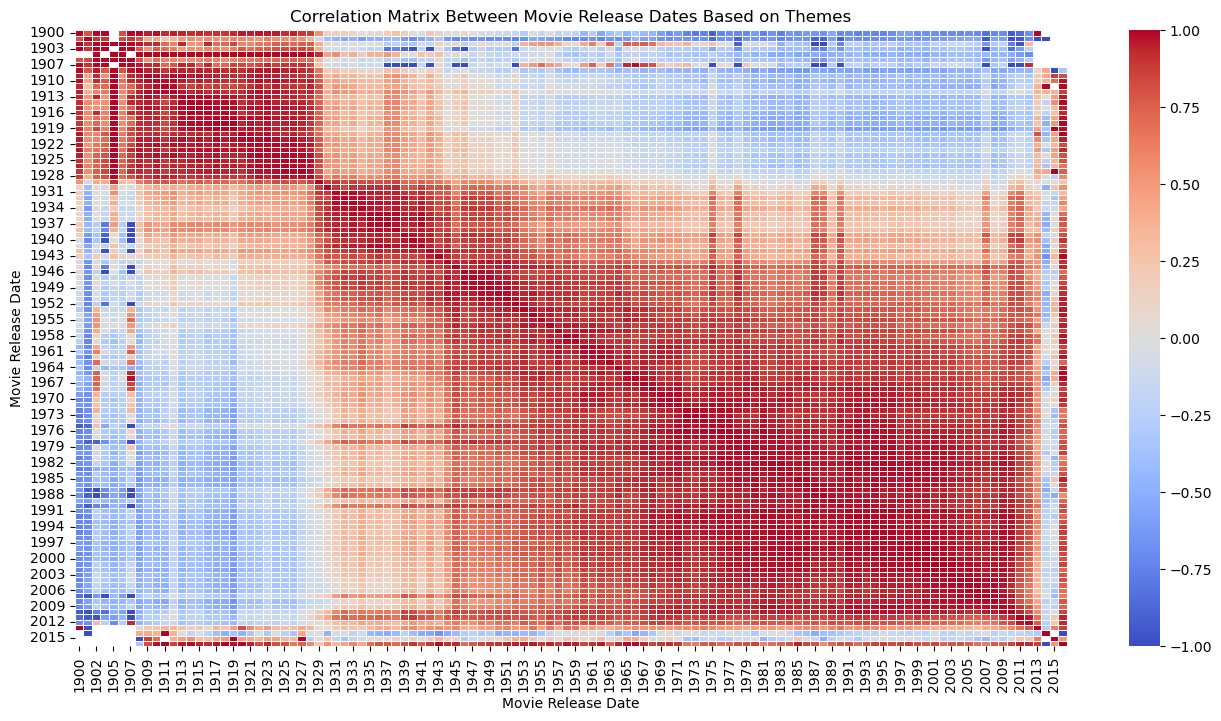

In [270]:
# Pivot the table to get Movie release date on both axes
release_date_themes_pivot = themes_years_counts.pivot_table(index='Themes', columns='Movie release date', values='count', aggfunc='sum')

# Calculate the correlation matrix between Movie release date based on the themes
correlation_matrix = release_date_themes_pivot.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Between Movie Release Dates Based on Themes')
plt.xlabel('Movie Release Date')
plt.ylabel('Movie Release Date')
plt.show()


In [271]:
# Create an empty figure
fig = go.Figure()

# Add each theme as a trace
for theme in themes:
    if theme in theme_years_counts_pivot.columns:
        fig.add_trace(go.Scatter(
            x=theme_years_counts_pivot.index,  # x-axis is the release year
            y=theme_years_counts_pivot[theme],  # y-axis is the number of movies for each theme
            mode='lines',  # Use lines for the plot
            name=theme,  # Set the theme name for the legend
            line=dict(color=theme_colors.get(theme, 'gray')),  # Use color mapping for each theme
            hovertemplate='Year: %{x}<br>Number of Movies: %{y}<br>'  # Custom hover text
        ))

# Add buttons for hide/show functionality
visibility = [[True if i == idx else False for i in range(len(themes))]
              for idx in range(len(themes))]

# Define "Select Theme" button
select_theme_button = dict(
    label="Select Theme",  # Displayed as a label in the dropdown
    method=None,  # Non-interactive option
    args=[]  # No action associated with this
)

theme_buttons = [
    dict(
        label=theme,
        method="update",
        args=[
            {"visible": vis},  # Update visibility
            {"title": f"Evolution of {theme} Movies Over the Periods"}  # Update title
        ]
    )
    for theme, vis in zip(themes, visibility)
]


# Combine "Select Theme" and theme-specific buttons
buttons = [select_theme_button] + theme_buttons

# Dropdown menu for individual themes
dropdown_menu = dict(
    type="dropdown",
    buttons=buttons,
    x=1.164,
    xanchor="center",
    y=1.06,
    yanchor="top",
)

# Button for "Show All" placed on the side
side_button = dict(
    type="buttons",
    buttons=[
        dict(
            label="Show All",
            method="update",
            args=[
                {"visible": [True] * len(themes)},
                {"title": "Evolution of Movie Themes Over the Periods"}
            ]
        )
    ],
    x=1.005,  # Adjust position to place on the side
    xanchor="left",
    y=1.09,
    yanchor="middle",
)

# Update layout
fig.update_layout(
    updatemenus=[dropdown_menu, side_button],
    title={
        'text': 'Evolution of Movie Themes Over the Years',
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title in the center
    },
    title_x=0.5,
    barmode='stack',
    xaxis_title='Release Year',
    yaxis_title='Number of Movies',
    legend_title="Themes",
    height=1000,
    width=1200,
)

# Show the interactive plot
fig.show()

In [272]:
# Step 1: Analyze the first 3 most popular themes for the earliest years
start_years = theme_years_counts_pivot.iloc[:5]  # Adjust to include a suitable range of early years
start_popular_themes = start_years.sum().nlargest(3).index  # Sum counts and select top 3 themes

# Step 2: Analyze the first 3 most popular themes for the most recent years
end_years = theme_years_counts_pivot.iloc[-5:]  # Adjust to include a suitable range of recent years
end_popular_themes = end_years.sum().nlargest(3).index  # Sum counts and select top 3 themes

# Function to create a plot for selected themes
def create_theme_plot(themes, title):
    fig = go.Figure()

    for theme in themes:
        if theme in theme_years_counts_pivot.columns:
            associated_genres = ', '.join(theme_mapping.get(theme, []))  # Get genres associated with the theme
            fig.add_trace(go.Scatter(
                x=theme_years_counts_pivot.index,  # x-axis is the release year
                y=theme_years_counts_pivot[theme],  # y-axis is the number of movies for each theme
                mode='lines',  # Use lines for the plot
                name=theme,  # Set the theme name for the legend
                line=dict(color=theme_colors.get(theme, 'gray')),  # Use color mapping for each theme
                hovertemplate=f'Genres: {associated_genres}<br>Year: %{{x}}<br>Number of Movies: %{{y}}<br>'  # Custom hover text
            ))

    # Update layout
    fig.update_layout(
        title={
            'text': title,
            'x': 0.5,  # Center the title
            'xanchor': 'center'  # Anchor the title in the center
        },
        xaxis_title='Release Year',
        yaxis_title='Number of Movies',
        legend_title="Themes",
        height=600,
        width=800,
    )

    return fig

# Step 3: Create plots
fig_start = create_theme_plot(start_popular_themes, "Top 3 Popular Themes in Early Years")
fig_end = create_theme_plot(end_popular_themes, "Top 3 Popular Themes in Recent Years")

# Show the plots
fig_start.show()
fig_end.show()


In [273]:
# Function to create a plot for selected themes
def create_theme_plot(themes, title):
    fig = go.Figure()

    for theme in themes:
        if theme in theme_years_counts_pivot.columns:
            # Get genres associated with the theme
            associated_genres = theme_mapping.get(theme, [])
            if len(associated_genres) > 5:
                genres_text = ', '.join(associated_genres[:5]) + ', ...'  # Truncate and add ellipsis
            else:
                genres_text = ', '.join(associated_genres)
            
            fig.add_trace(go.Scatter(
                x=theme_years_counts_pivot.index,  # x-axis is the release year
                y=theme_years_counts_pivot[theme],  # y-axis is the number of movies for each theme
                mode='lines',  # Use lines for the plot
                name=theme,  # Set the theme name for the legend
                line=dict(color=theme_colors.get(theme, 'gray')),  # Use color mapping for each theme
                hovertemplate=f'<b>Genres:</b> {genres_text}<br>'
                              f'<b>Year:</b> %{{x}}<br><b>Number of Movies:</b> %{{y}}<br>'  # Custom hover text
            ))

    # Update layout
    fig.update_layout(
        title={
            'text': title,
            'x': 0.5,  # Center the title
            'xanchor': 'center'  # Anchor the title in the center
        },
        xaxis_title='Release Year',
        yaxis_title='Number of Movies',
        legend_title="Themes",
        height=600,
        width=800,
    )

    return fig

# Step 3: Create plots
fig_start = create_theme_plot(start_popular_themes, "Top 3 Popular Themes in Early Years")
fig_end = create_theme_plot(end_popular_themes, "Top 3 Popular Themes in Recent Years")

# Show the plots
fig_start.show()
fig_end.show()


In [275]:
# Create an empty figure
fig = go.Figure()

hover_text = theme_years_counts_pivot.apply(lambda row: '<br>'.join([f'{theme}: {count}' for theme, count in row.items()]), axis=1)

# Add a single trace with customized hover text
for theme in theme_years_counts_pivot.columns:
    hover_text = [
        f'<b>Year: {year}</b><br>' + '<br>'.join([f'{t}: {theme_years_counts_pivot[t].loc[year]}' for t in theme_years_counts_pivot.columns])
        for year in theme_years_counts_pivot.index
    ]
    fig.add_trace(go.Scatter(
        x=theme_years_counts_pivot.index,  # x-axis is the release year
        y=theme_years_counts_pivot[theme],  # y-axis is the number of movies for each theme
        name=theme,  # Set the theme name for the legend
        mode='lines',
        line=dict(color=theme_colors.get(theme, 'gray')),  # Use color mapping for each theme
        hovertext=hover_text,
        hoverinfo='text'
    ))

# Update layout for the plot
fig.update_layout(
    title={
        'text': 'Evolution of Movie Themes Over the Years',
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title in the center
    },
    xaxis_title='Release Year',
    yaxis_title='Number of Movies',
    legend_title='Themes',
    height=600,
    width=1000,
    xaxis_tickangle=270,  # Rotate x-axis labels for better visibility
    template='plotly_dark'
)

# Show the interactive plot
fig.show()


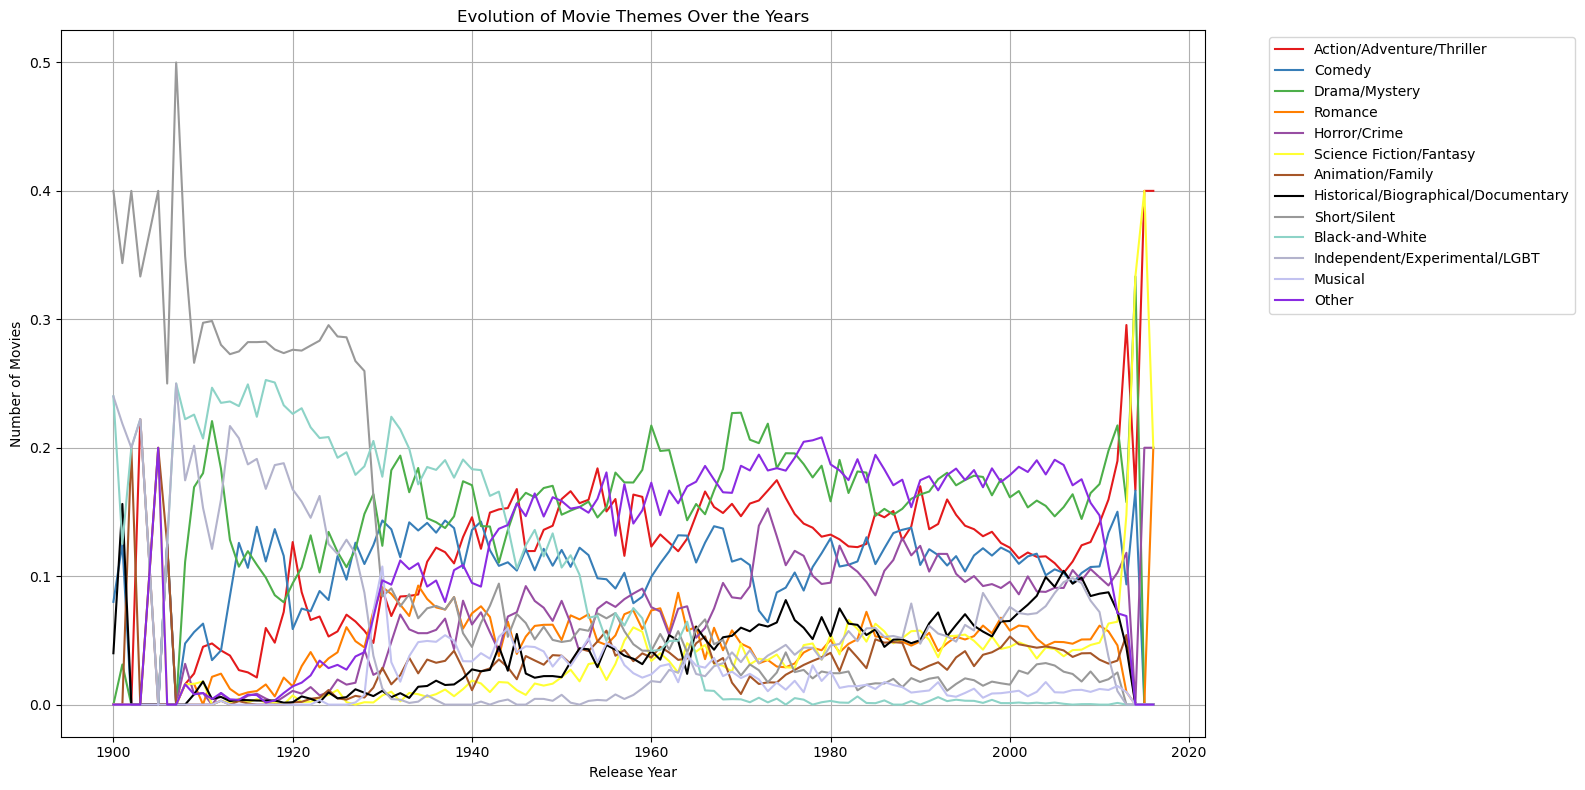

In [276]:
# Plot the number of movies in each genre for each year
plt.figure(figsize=(16, 8))

for theme in themes:
    if theme in normalized_theme_years_counts.columns:
        plt.plot(normalized_theme_years_counts.index, normalized_theme_years_counts[theme], label=theme, color=theme_colors[theme])

plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Evolution of Movie Themes Over the Years')
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid()
plt.tight_layout()
plt.show()

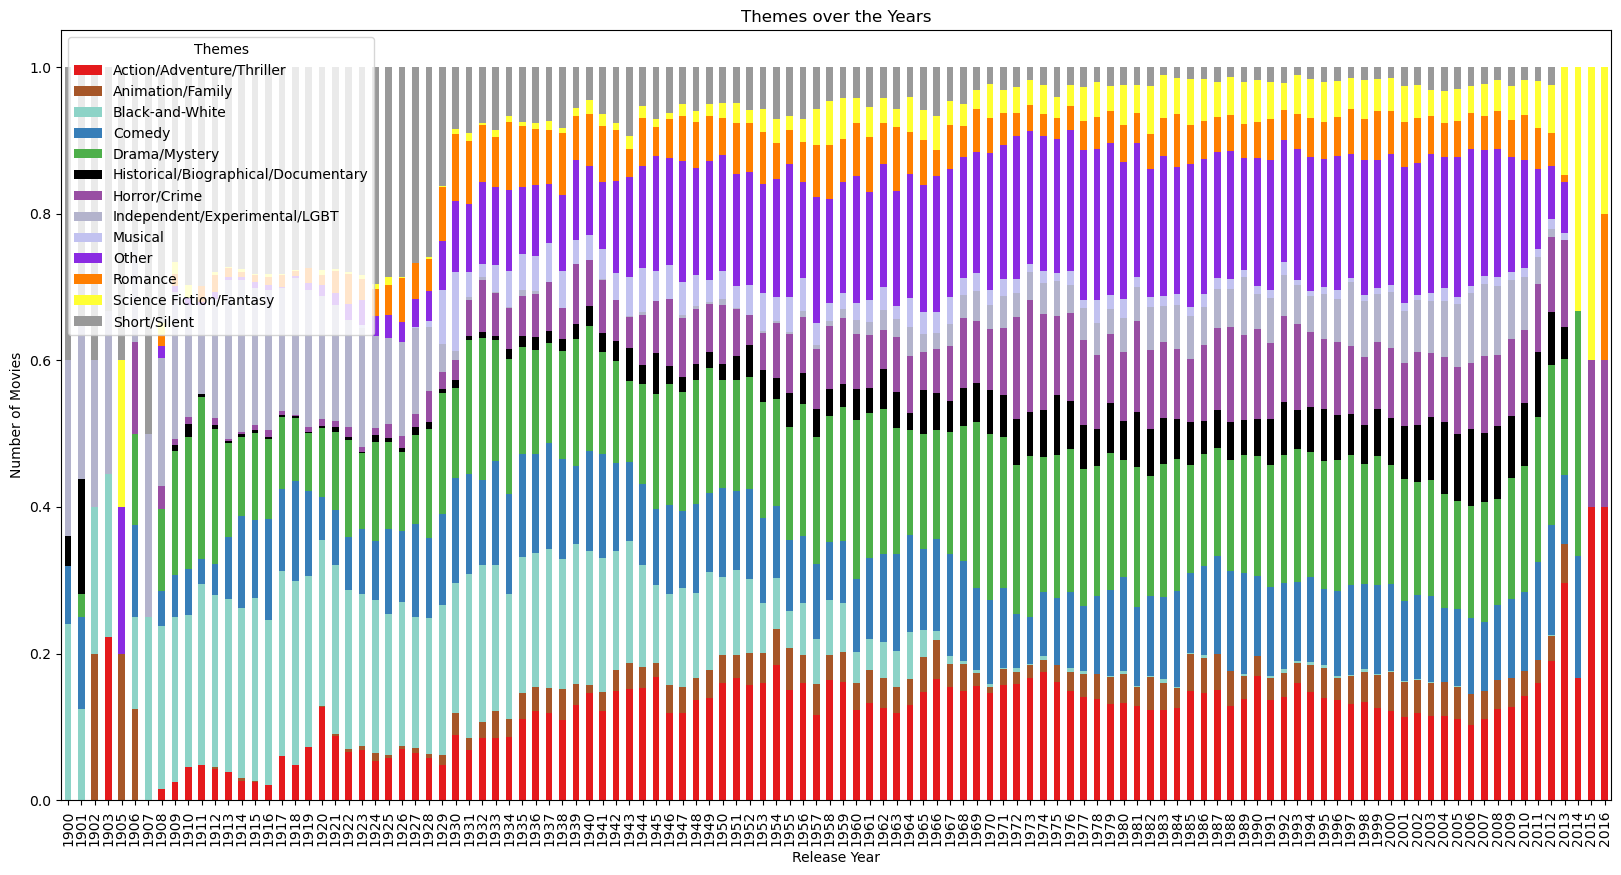

In [277]:
normalized_theme_years_counts.plot(kind='bar', stacked=True, figsize=(20, 10), color=[theme_colors[theme] for theme in theme_years_counts_pivot.columns])
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Themes over the Years')
plt.legend(title='Themes')
plt.xticks(rotation=90)
plt.show()

In [278]:
# Create an empty figure
fig = go.Figure()

# Add each theme as a trace
for theme in theme_years_counts_pivot.columns:
    fig.add_trace(go.Bar(
        x=theme_years_counts_pivot.index,  # x-axis is the release year
        y=normalized_theme_years_counts[theme],  # y-axis is the number of movies for each theme
        name=theme,  # Set the theme name for the legend
        marker_color=theme_colors.get(theme, 'gray'),  # Use color mapping for each theme
        hovertemplate='Year: %{x}<br>' + 'Theme proportion: %{y}<br>',  # Custom hover text
    ))

# Update layout for the plot
fig.update_layout(
    title={
        'text': 'Themes over the Years',
        'x': 0.5,  # center the title
        'xanchor': 'center'  # anchor the title in the center
    },
    xaxis_title='Release Year',
    yaxis_title='Number of Movies',
    barmode='stack',
    xaxis_tickangle=270,
    legend_title='Themes',
    height=1000,
    width=1200
)

# Show the interactive plot
fig.show()


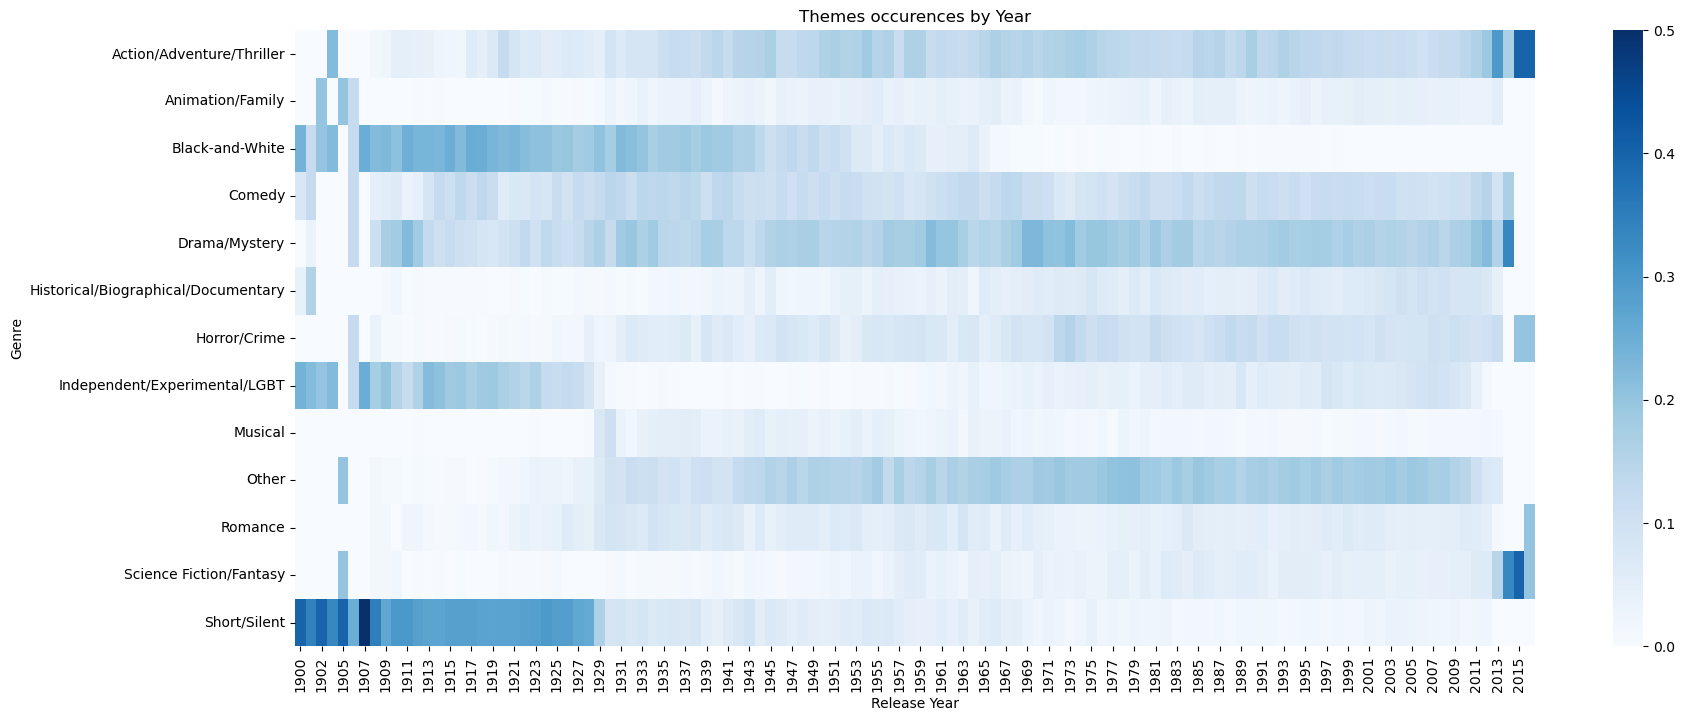

In [279]:
# Plot a heatmap showing top 3 genre appearances across years
plt.figure(figsize=(20, 8))
sns.heatmap(normalized_theme_years_counts.T, cmap="Blues")
plt.xlabel("Release Year")
plt.ylabel("Genre")
plt.title("Themes occurences by Year")
plt.show()

#### Themes according to Periods

In [280]:
movies_df_copy_exploded = movies_df_copy_exploded.explode('Periods')

themes_counts_periods = (
    movies_df_copy_exploded
    .groupby(['Themes', 'Periods'])
    .size()
    .reset_index(name='count')
)

# Pivot the table so that each theme has its own column
theme_periods_counts_pivot = themes_counts_periods.pivot(index='Periods', columns='Themes', values='count')

sorted_periods = sorted(period_order_map_dict.keys(), key=lambda x: period_order_map_dict[x])

# Reorder the index of the pivot table based on the sorted periods
theme_periods_counts_pivot = theme_periods_counts_pivot.loc[sorted_periods]
theme_periods_counts_pivot = theme_periods_counts_pivot.fillna(0)

# Normalize the counts row-wise to calculate percentages
normalized_theme_periods_counts = theme_periods_counts_pivot.div(theme_periods_counts_pivot.sum(axis=1), axis=0)

# Display the percentage pivot table
normalized_theme_periods_counts

Themes                                             Action/Adventure/Thriller  \
Periods                                                                        
The Belle Époque (1900-1914)                                        0.038050   
World War I (1914-1918)                                             0.038002   
The Roaring Twenties (1920-1929)                                    0.072216   
The Great Depression (1929-1939)                                    0.101693   
World War II (1939-1945)                                            0.144234   
Early Cold War (1947-1960)                                          0.149522   
The Civil Rights Movement (1960-1970)                               0.143366   
Late Cold War (1971-1989)                                           0.142287   
End of the Cold War (1990-1991)                                     0.153207   
Post-Cold War and the New World Order (1992-2001)                   0.136069   
War on Terrorism (2001-present)                                     0.122825   

Themes                                             Animation/Family  \
Periods                                                               
The Belle Époque (1900-1914)                               0.002378   
World War I (1914-1918)                                    0.000784   
The Roaring Twenties (1920-1929)                           0.005203   
The Great Depression (1929-1939)                           0.030136   
World War II (1939-1945)                                   0.026555   
Early Cold War (1947-1960)                                 0.039771   
The Civil Rights Movement (1960-1970)                      0.034728   
Late Cold War (1971-1989)                                  0.034980   
End of the Cold War (1990-1991)                            0.028611   
Post-Cold War and the New World Order (1992-2001)          0.039384   
War on Terrorism (2001-present)                            0.041159   

Themes                                             Black-and-White    Comedy  \
Periods                                                                        
The Belle Époque (1900-1914)                              0.230678  0.064209   
World War I (1914-1918)                                   0.239569  0.122037   
The Roaring Twenties (1920-1929)                          0.203746  0.092820   
The Great Depression (1929-1939)                          0.190946  0.133111   
World War II (1939-1945)                                  0.153874  0.120953   
Early Cold War (1947-1960)                                0.089107  0.104852   
The Civil Rights Movement (1960-1970)                     0.026492  0.123108   
Late Cold War (1971-1989)                                 0.002219  0.112705   
End of the Cold War (1990-1991)                           0.001384  0.114905   
Post-Cold War and the New World Order (1992-2001)         0.002684  0.115943   
War on Terrorism (2001-present)                           0.000728  0.108032   

Themes                                             Drama/Mystery  \
Periods                                                            
The Belle Époque (1900-1914)                            0.152200   
World War I (1914-1918)                                 0.103036   
The Roaring Twenties (1920-1929)                        0.118210   
The Great Depression (1929-1939)                        0.160169   
World War II (1939-1945)                                0.144416   
Early Cold War (1947-1960)                              0.165150   
The Civil Rights Movement (1960-1970)                   0.182547   
Late Cold War (1971-1989)                               0.173865   
End of the Cold War (1990-1991)                         0.164744   
Post-Cold War and the New World Order (1992-2001)       0.172376   
War on Terrorism (2001-present)                         0.161033   

Themes                                             Historical/Biographical/Documentary  \
Periods            

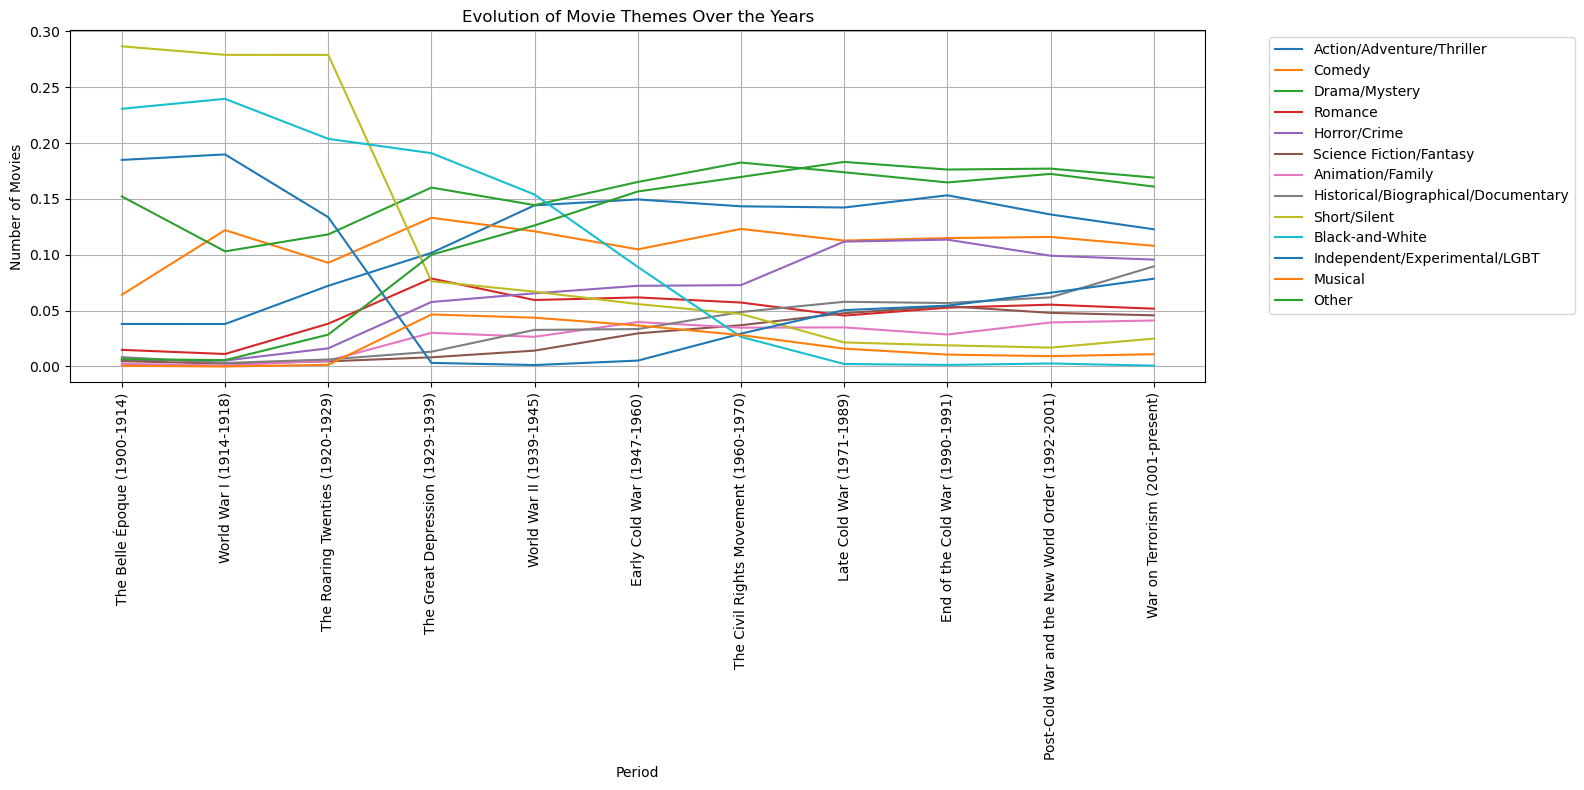

In [281]:
# Plot the number of movies in each genre for each period
plt.figure(figsize=(16, 8))

for theme in themes:
    if theme in normalized_theme_periods_counts.columns:
        plt.plot(normalized_theme_periods_counts.index, normalized_theme_periods_counts[theme], label=theme)

plt.xlabel('Period')
plt.ylabel('Number of Movies')
plt.title('Evolution of Movie Themes Over the Years')
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [282]:
# Create an empty figure
fig = go.Figure()

# Add each theme as a trace
for theme in themes:
    if theme in theme_periods_counts_pivot.columns:
        fig.add_trace(go.Scatter(
            x=theme_periods_counts_pivot.index,  # x-axis is the release year
            y=theme_periods_counts_pivot[theme],  # y-axis is the number of movies for each theme
            mode='lines',  # Use lines for the plot
            name=theme,  # Set the theme name for the legend
            line=dict(color=theme_colors.get(theme, 'gray')),  # Use color mapping for each theme
            hovertemplate='Period: %{x}<br>Number of Movies: %{y}<br>'  # Custom hover text
        ))

# Update layout for the plot
fig.update_layout(
    title={
        'text': 'Evolution of Movie Themes Over the Periods',
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title in the center
    },
    xaxis_title='Period',
    yaxis_title='Number of Movies',
    legend_title='Themes',
    height=1000,
    width=1100,
    xaxis_tickangle=270,  # Rotate x-axis labels for better visibility
)

# Show the interactive plot
fig.show()

In [283]:
import plotly.express as px

# Create an empty figure
fig = go.Figure()

hover_text = theme_periods_counts_pivot.apply(lambda row: '<br>'.join([f'{theme}: {count}' for theme, count in row.items()]), axis=1)

# Add a single trace with customized hover text
for theme in theme_periods_counts_pivot.columns:
    hover_text = [
        f'<b>Year: {year}</b><br>' + '<br>'.join([f'{t}: {theme_periods_counts_pivot[t].loc[year]}' for t in theme_periods_counts_pivot.columns])
        for year in theme_periods_counts_pivot.index
    ]
    fig.add_trace(go.Scatter(
        x=theme_periods_counts_pivot.index,  # x-axis is the release year
        y=theme_periods_counts_pivot[theme],  # y-axis is the number of movies for each theme
        name=theme,  # Set the theme name for the legend
        mode='lines',
        line=dict(color=theme_colors.get(theme, 'gray')),  # Use color mapping for each theme
        hovertext=hover_text,
        hoverinfo='text'
    ))

# Update layout for the plot
fig.update_layout(
    title={
        'text': 'Evolution of Movie Themes Over the Years',
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title in the center
    },
    xaxis_title='Release Year',
    yaxis_title='Number of Movies',
    legend_title='Themes',
    height=1000,
    width=1000,
    xaxis_tickangle=270,  # Rotate x-axis labels for better visibility
    template='plotly_dark'
)

# Show the interactive plot
fig.show()

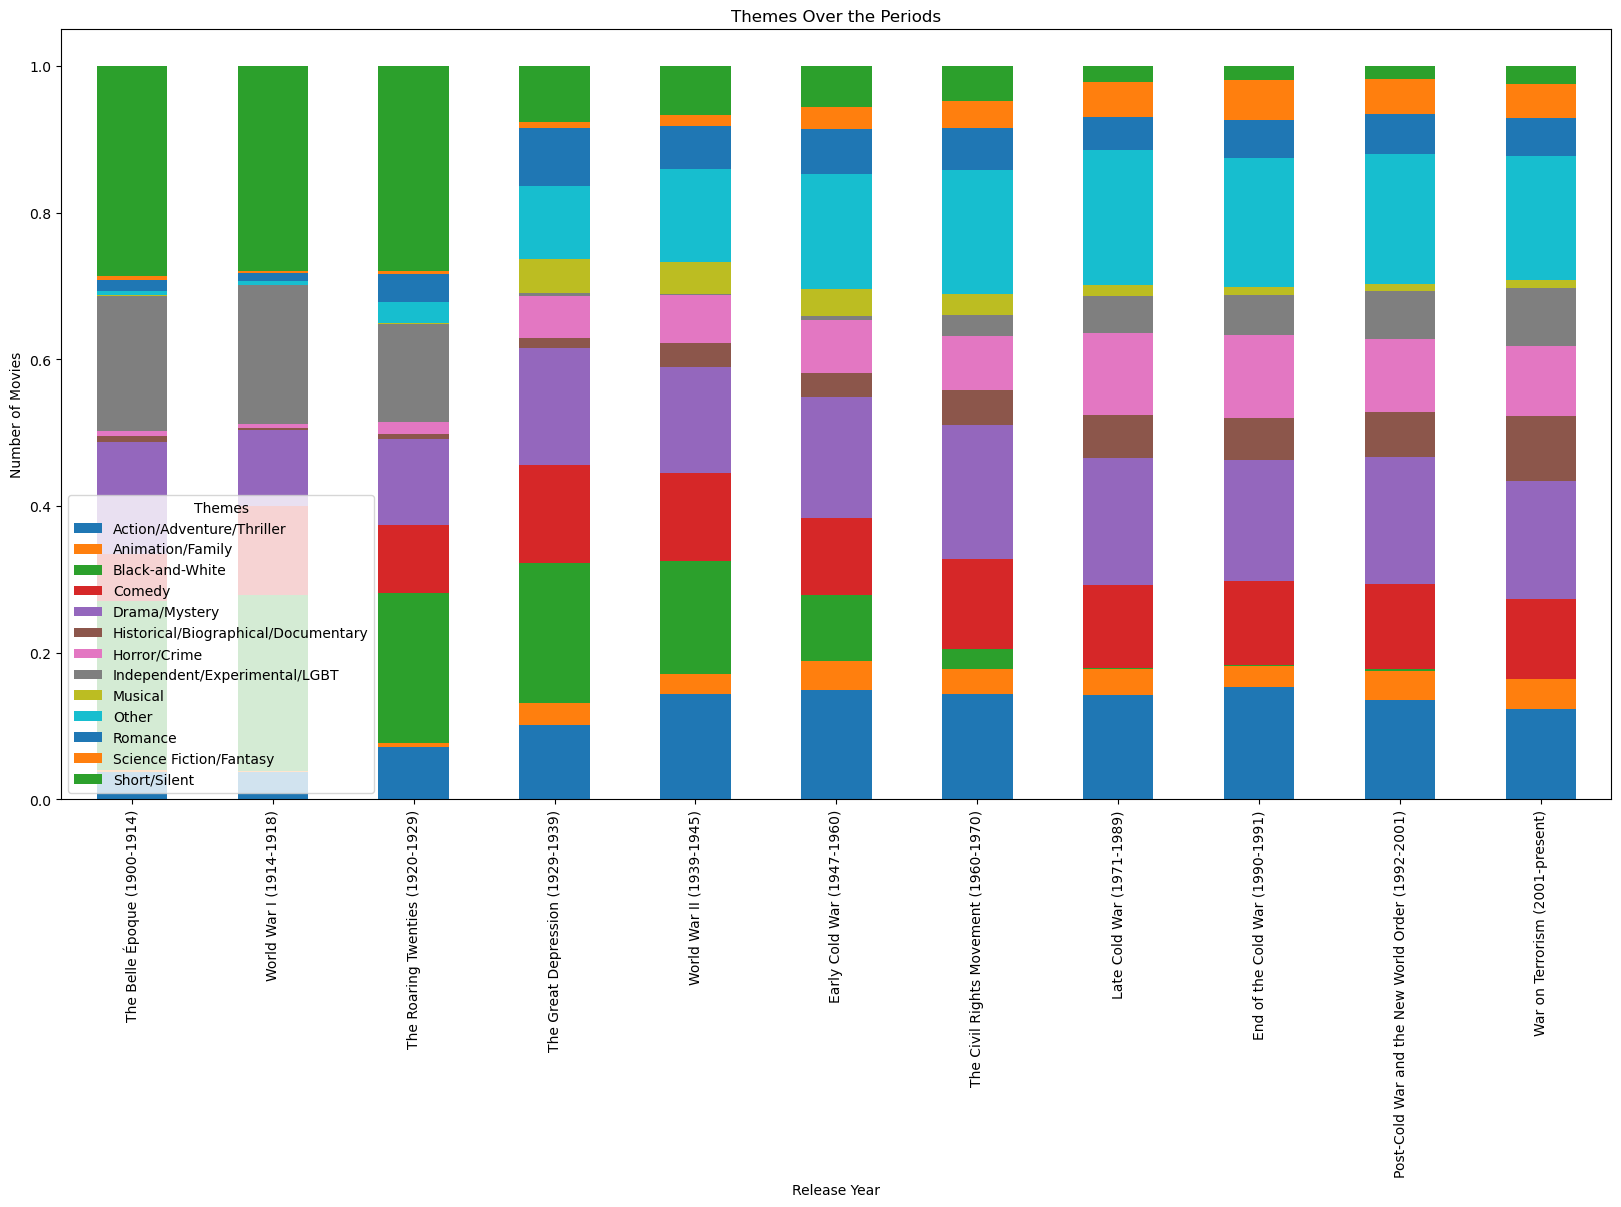

In [284]:
normalized_theme_periods_counts.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Themes Over the Periods')
plt.legend(title='Themes')
plt.xticks(rotation=90)
plt.show()

In [285]:
# Create an empty figure
fig = go.Figure()

# Add each theme as a trace
for theme in normalized_theme_periods_counts.columns:
    fig.add_trace(go.Bar(
        x=normalized_theme_periods_counts.index,  # x-axis is the release year
        y=normalized_theme_periods_counts[theme],  # y-axis is the number of movies for each theme
        name=theme,  # Set the theme name for the legend
        marker_color=theme_colors.get(theme, 'gray'),  # Use color mapping for each theme
        hovertemplate='Period: %{x}<br>' + 'Theme proportion: %{y}<br>',  # Custom hover text
    ))

# Add buttons for hide/show functionality
visibility = [[True if i == idx else False for i in range(len(themes))]
              for idx in range(len(themes))]

# Define "Select Theme" button
select_theme_button = dict(
    label="Select Theme",  # Displayed as a label in the dropdown
    method=None,  # Non-interactive option
    args=[]  # No action associated with this
)

theme_buttons = [
    dict(
        label=theme,
        method="update",
        args=[
            {"visible": vis},  # Update visibility
            {"title": f"Evolution of {theme} Movies Over the Periods"}  # Update title
        ]
    )
    for theme, vis in zip(themes, visibility)
]



# Combine "Select Theme" and theme-specific buttons
buttons = [select_theme_button] + theme_buttons

# Dropdown menu for individual themes
dropdown_menu = dict(
    type="dropdown",
    buttons=buttons,
    x=1.164,
    xanchor="center",
    y=1.06,
    yanchor="top",
)

# Button for "Show All" placed on the side
side_button = dict(
    type="buttons",
    buttons=[
        dict(
            label="Show All",
            method="update",
            args=[
                {"visible": [True] * len(themes)},
                {"title": "Evolution of Movie Themes Over the Periods"}
            ]
        )
    ],
    x=1.005,  # Adjust position to place on the side
    xanchor="left",
    y=1.09,
    yanchor="middle",
)

# Update layout
fig.update_layout(
    updatemenus=[dropdown_menu, side_button],
    title="Evolution of Movie Themes Over the Periods",
    title_x=0.5,
    barmode='stack',
    xaxis_title="Period",
    yaxis_title="Proportion of Movies",
    legend_title="Themes",
    height=1000,
    width=1200,
)

"""
# Update layout for the plot
fig.update_layout(
    title={
        'text': 'Themes over the Periods',
        'x': 0.5,  # center the title
        'xanchor': 'center'  # anchor the title in the center
    },
    xaxis_title='Period',
    yaxis_title='Number of Movies',
    barmode='stack',
    xaxis_tickangle=270,
    legend_title='Themes',
    height=1000,
    width=1000
)
"""

# Show the interactive plot
fig.show()
fig.write_html('/Users/lilly-flore/Desktop/bar_theme_period.html')

In [286]:
import plotly.graph_objects as go

# Create an empty figure
fig = go.Figure()

# Add each theme as a trace
for theme in themes:
    if theme in normalized_theme_periods_counts.columns:
        fig.add_trace(go.Scatter(
            x=normalized_theme_periods_counts.index,  # x-axis is the release year
            y=normalized_theme_periods_counts[theme],  # y-axis is the number of movies for each theme
            mode='lines',  # Use lines for the plot
            name=theme,  # Set the theme name for the legend
            line=dict(color=theme_colors.get(theme, 'gray')),  # Use color mapping for each theme
            hovertemplate='Period: %{x}<br>Number of Movies: %{y}<br>',  # Custom hover text
        ))

# Update layout for the plot
fig.update_layout(
    title={
        'text': 'Evolution of Movie Themes Over the Periods',
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title in the center
    },
    xaxis_title='Period',
    yaxis_title='Proportion of movies',
    legend_title='Themes',
    height=1000,
    width=1100,
    xaxis_tickangle=270,  # Rotate x-axis labels for better visibility
)

# Show the interactive plot
fig.show()

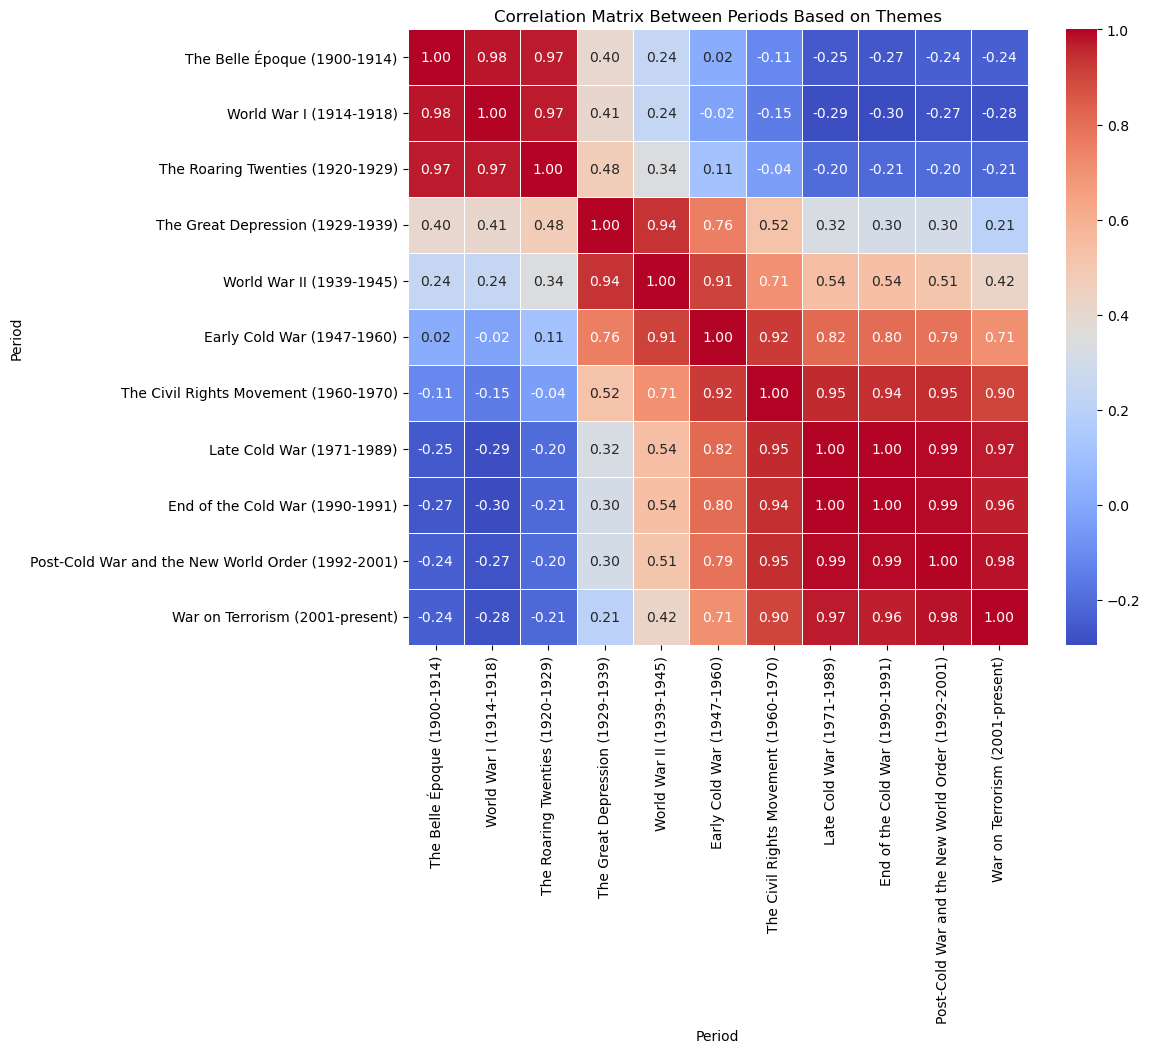

In [287]:
periods_themes_pivot = normalized_theme_periods_counts.T
# Calculate the correlation matrix between periods based on the themes
correlation_matrix = periods_themes_pivot.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Between Periods Based on Themes')
plt.xlabel('Period')
plt.ylabel('Period')
plt.show()

In [288]:
# Create an empty figure
fig = go.Figure()

# Add traces for each theme
for theme in themes:
    if theme in normalized_theme_periods_counts.columns:
        fig.add_trace(go.Scatter(
            x=normalized_theme_periods_counts.index,  # x-axis: Period
            y=normalized_theme_periods_counts[theme],  # y-axis: theme counts
            mode='lines',
            name=theme,
            line=dict(color=theme_colors.get(theme, 'gray')),
            hovertemplate='Period: %{x}<br>Number of Movies: %{y}<br>'
        ))

# Add buttons for hide/show functionality
visibility = [[True if i == idx else False for i in range(len(themes))]
              for idx in range(len(themes))]

# Define "Select Theme" button
select_theme_button = dict(
    label="Select Theme",  # Displayed as a label in the dropdown
    method=None,  # Non-interactive option
    args=[]  # No action associated with this
)

theme_buttons = [
    dict(
        label=theme,
        method="update",
        args=[
            {"visible": vis},  # Update visibility
            {"title": f"Evolution of {theme} Movies Over the Periods"}  # Update title
        ]
    )
    for theme, vis in zip(themes, visibility)
]



# Combine "Select Theme" and theme-specific buttons
buttons = [select_theme_button] + theme_buttons

# Dropdown menu for individual themes
dropdown_menu = dict(
    type="dropdown",
    buttons=buttons,
    x=1.164,
    xanchor="center",
    y=1.06,
    yanchor="top",
)

# Button for "Show All" placed on the side
side_button = dict(
    type="buttons",
    buttons=[
        dict(
            label="Show All",
            method="update",
            args=[
                {"visible": [True] * len(themes)},
                {"title": "Evolution of Movie Themes Over the Periods"}
            ]
        )
    ],
    x=1.005,  # Adjust position to place on the side
    xanchor="left",
    y=1.09,
    yanchor="middle",
)

# Update layout
fig.update_layout(
    updatemenus=[dropdown_menu, side_button],
    title="Evolution of Movie Themes Over the Periods",
    title_x=0.5,
    xaxis_title="Period",
    yaxis_title="Proportion of Movies",
    legend_title="Themes",
    height=1000,
    width=1200,
)

# Show plot
fig.show()

In [289]:
import plotly.express as px
import pandas as pd


# Reset index and melt the DataFrame into long format
df_long = normalized_theme_periods_counts.reset_index().melt(id_vars=[normalized_theme_periods_counts.index.name], value_vars=normalized_theme_periods_counts.columns, var_name='Theme', value_name='Proportion of Movies')

# Rename columns for clarity
df_long.rename(columns={normalized_theme_periods_counts.index.name: 'Period'}, inplace=True)

# Create the line plot using Plotly Express
fig = px.line(df_long, x='Period', y='Proportion of Movies', color='Theme', 
              title="Evolution of Movie Themes Over the Periods",
              labels={'Proportion of Movies': 'Proportion of Movies', 'Period': 'Period'},
              line_shape="linear")

# Update layout with dropdown for theme selection
fig.update_layout(
    updatemenus=[
        {
            "type": "dropdown",
            "x": 1.164,
            "xanchor": "center",
            "y": 1.06,
            "yanchor": "top",
            "buttons": [
                {
                    "label": "Select Theme",
                    "method": "update",
                    "args": [None, {"title": "Evolution of Movie Themes Over the Periods"}]
                },
                *[
                    {
                        "label": theme,
                        "method": "update",
                        "args": [
                            {"visible": [theme == t for t in normalized_theme_periods_counts.columns]},
                            {"title": f"Evolution of {theme} Movies Over the Periods"}
                        ]
                    }
                    for theme in normalized_theme_periods_counts.columns
                ]
            ]
        },
        {
            "type": "buttons",
            "buttons": [
                {
                    "label": "Show All",
                    "method": "update",
                    "args": [{"visible": [True] * len(normalized_theme_periods_counts.columns)}, {"title": "Evolution of Movie Themes Over the Periods"}]
                }
            ],
            "x": 1.005,
            "xanchor": "left",
            "y": 1.09,
            "yanchor": "middle",
        }
    ],
    title_x=0.5,
    legend_title="Themes",
    height=1000,
    width=1200,
)

# Show plot
fig.show()


In [290]:
# Generate the count of movies per period and theme
periods_themes_counts = (
    movies_df_copy_exploded
    .groupby(['Periods', 'Themes'])
    .size()
    .reset_index(name='count')
)

# Normalizing the count column by the total count per 'Themes'
periods_themes_counts['normalized_count'] = periods_themes_counts.groupby('Themes')['count'].transform(lambda x: x / x.sum())

# Group by 'Themes' and apply to get the top 3 periods by normalized count
top_periods_by_genre = periods_themes_counts.groupby('Themes').apply(
    lambda x: x[['Periods', 'normalized_count']].nlargest(3, 'normalized_count')
).reset_index(drop=False)

# Rename the index to 'level_1' to avoid confusion and ensure 'Themes' is a column
top_periods_by_genre.rename(columns={'level_1': 'Theme_Index'}, inplace=True)

print(top_periods_by_genre)

                                 Themes  Theme_Index  \
0             Action/Adventure/Thriller          104   
1             Action/Adventure/Thriller           26   
2             Action/Adventure/Thriller           39   
3                      Animation/Family          105   
4                      Animation/Family           40   
5                      Animation/Family           27   
6                       Black-and-White           80   
7                       Black-and-White          119   
8                       Black-and-White           93   
9                                Comedy          107   
10                               Comedy           29   
11                               Comedy           42   
12                        Drama/Mystery          108   
13                        Drama/Mystery           30   
14                        Drama/Mystery           43   
15  Historical/Biographical/Documentary          109   
16  Historical/Biographical/Documentary         

/var/folders/tj/z0dp280955b2cclgs13c8ngm0000gn/T/ipykernel_36828/2923945076.py:13: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



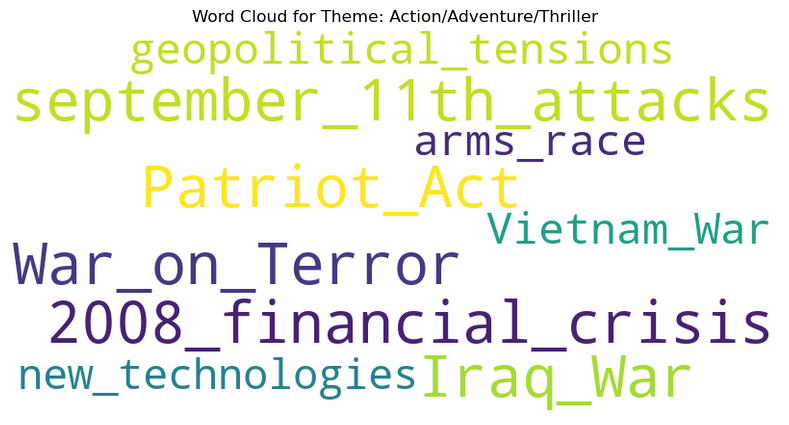

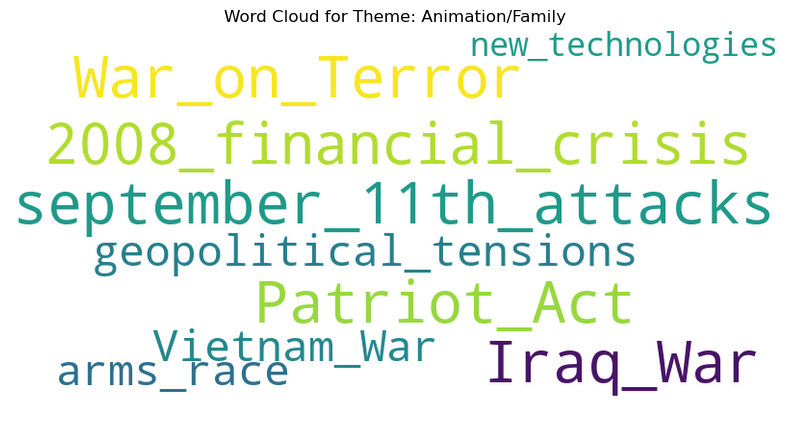

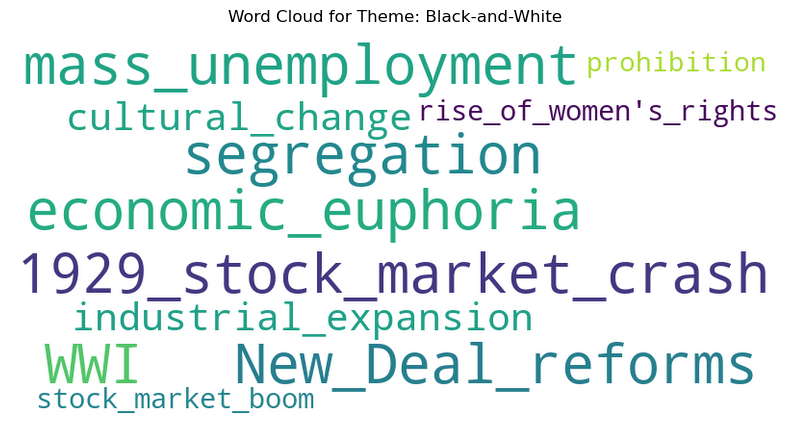

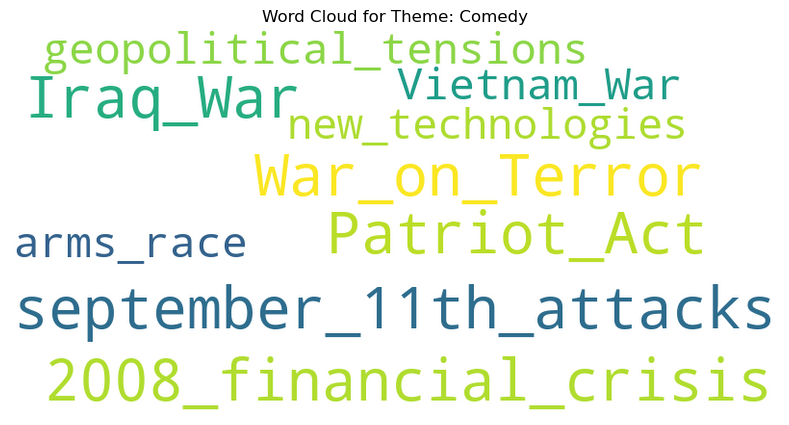

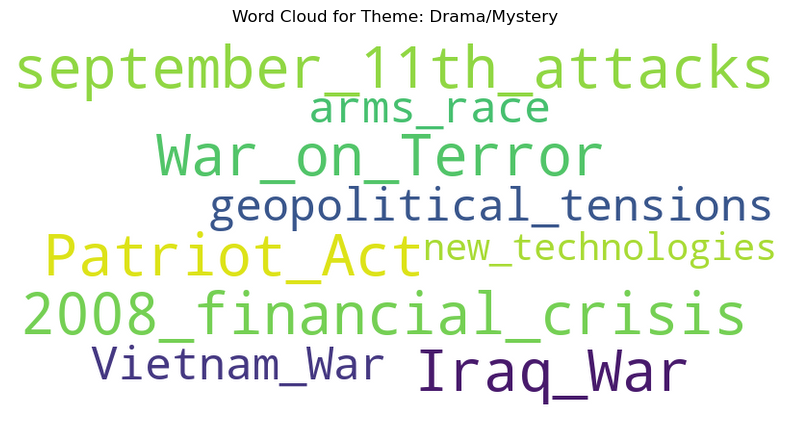

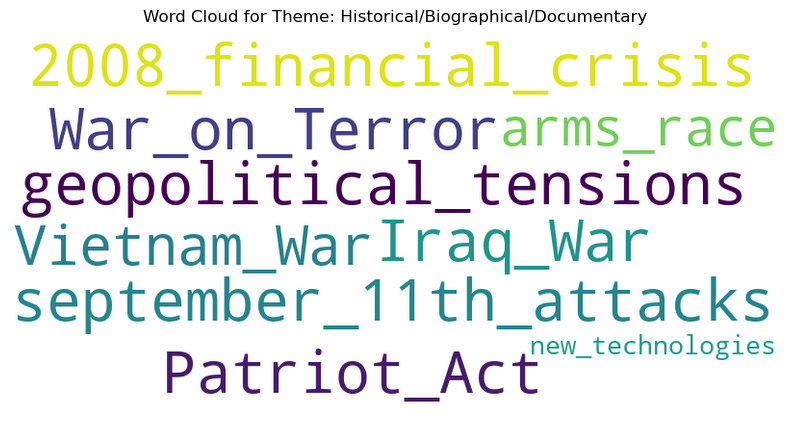

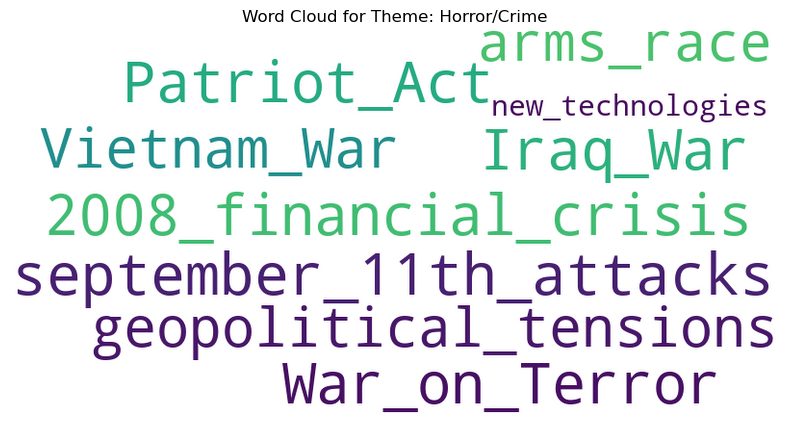

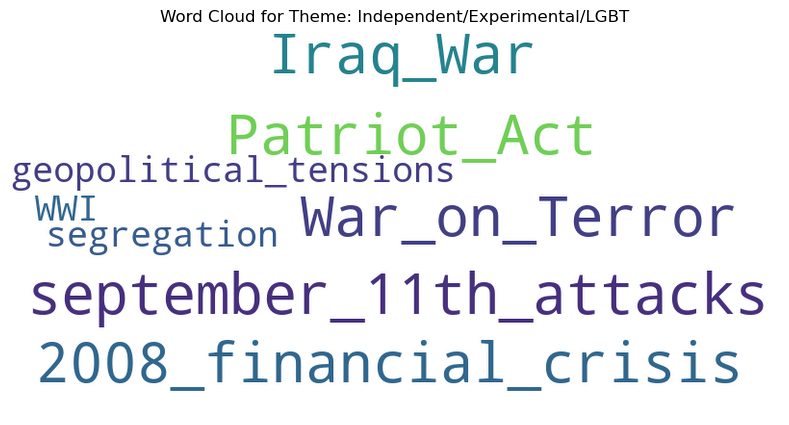

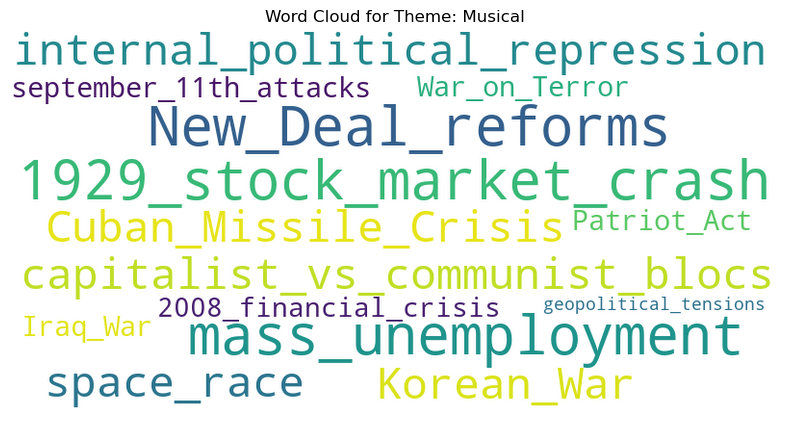

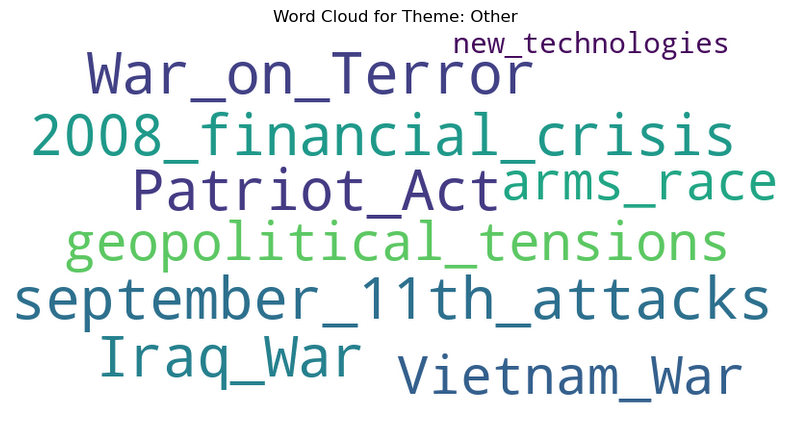

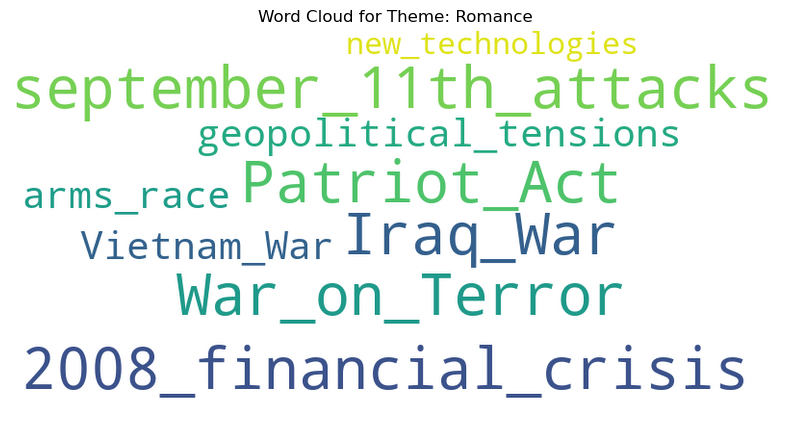

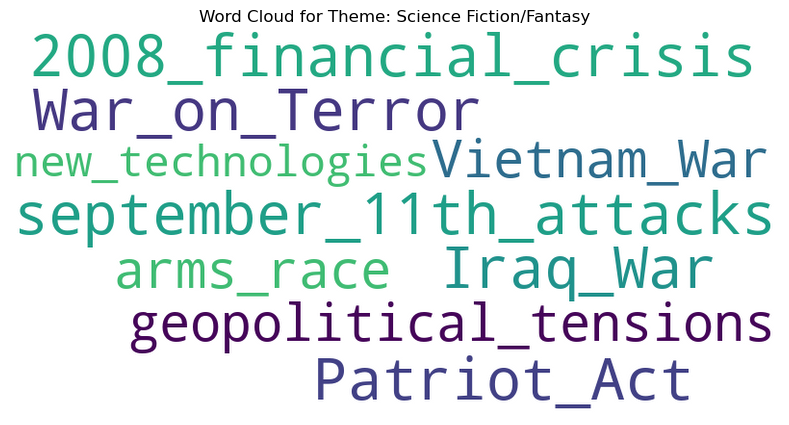

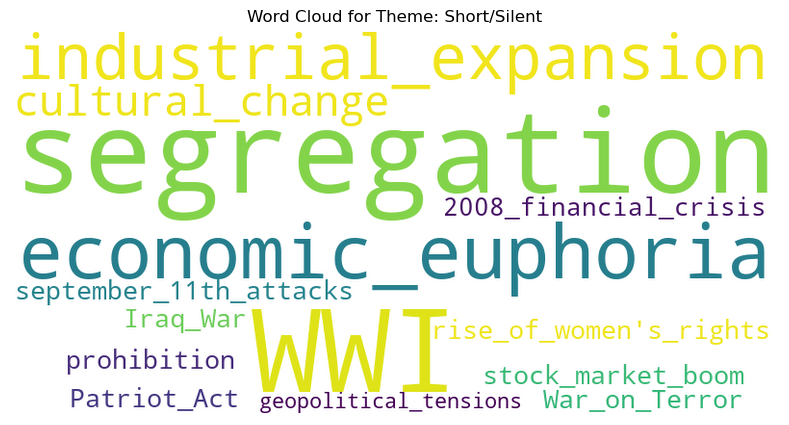

In [291]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Loop through each theme and create a wordcloud based on the top 3 periods' events
for theme in top_periods_by_genre['Themes'].unique():
    # Get the top 3 periods for the theme
    top_periods = top_periods_by_genre[top_periods_by_genre['Themes'] == theme]['Periods']
    
    # Collect all events for the top 3 periods, keeping each event as individual
    events = []
    for period in top_periods:
        events.extend(periods_events_map.get(period, [])) 
    
    events_text = ' '.join(events)
    
    # Generate the word cloud with events considered as individual strings
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        collocations=False  # Ensure no collocations
    ).generate(events_text)
    
    # Plot the word cloud
    plt.figure(figsize=(15, 5))
    plt.imshow(wordcloud, interpolation='lanczos')
    plt.axis('off')
    plt.title(f"Word Cloud for Theme: {theme}")
    plt.show()


# Anoush

In [292]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33202 entries, 0 to 33201
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Movie name          33202 non-null  object
 1   Movie release date  33202 non-null  int64 
 2   Movie genres        33202 non-null  object
 3   Periods             33202 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [293]:
movies_df.describe()

Movie release date
count        33202.000000
mean          1973.988073
std             30.947831
min           1900.000000
25%           1946.000000
50%           1984.000000
75%           2002.000000
max           2016.000000

In [294]:
print("percentage of NaNs per columns")
movies_df.isna().mean() * 100

percentage of NaNs per columns


Movie name            0.0
Movie release date    0.0
Movie genres          0.0
Periods               0.0
dtype: float64

In [295]:
movies_df.sample(10)

Movie name  Movie release date  \
27317  Death Bed: The Bed That Eats                1977   
19347       Hitler, Beast of Berlin                1939   
26415             Suicide Battalion                1958   
20428             The Glory Brigade                1953   
14555                    State Fair                1945   
5646              The Scarlet Spear                1954   
21927        Unaccustomed As We Are                1929   
32746           Fear of a Black Hat                1994   
5489                 Wild Wild West                1999   
4232          An Affair to Remember                1957   

                                            Movie genres  \
27317                         ['Horror', 'Supernatural']   
19347                       ['Propaganda film', 'Drama']   
26415                          ['Adventure', 'War film']   
20428                          ['Drama', 'Combat Films']   
14555                        ['Musical', 'Romance Film']   
5646                              ['Drama', 'Adventure']   
21927  ['Short Film', 'Comedy', 'Black-and-white', 'S...   
32746  ['Parody', 'Mockumentary', 'Indie', 'Hip hop m...   
5489   ['Science Fiction', 'Buddy film', 'Comedy West...   
4232   ['Romantic drama', 'Romance Film', 'Melodrama'...   

                                                 Periods  
27317                        [Late Cold War (1971-1989)]  
19347                 [The Great Depression (1929-1939)]  
26415                       [Early Cold War (1947-1960)]  
20428                       [Early Cold War (1947-1960)]  
14555                         [World War II (1939-1945)]  
5646                        [Early Cold War (1947-1960)]  
21927                   [Year not in any defined period]  
32746  [Post-Cold War and the New World Order (1992-2...  
5489   [Post-Cold War and the New World Order (1992-2...  
4232                        [Early Cold War (1947-1960)]

<Axes: xlabel='genre', ylabel='count'>

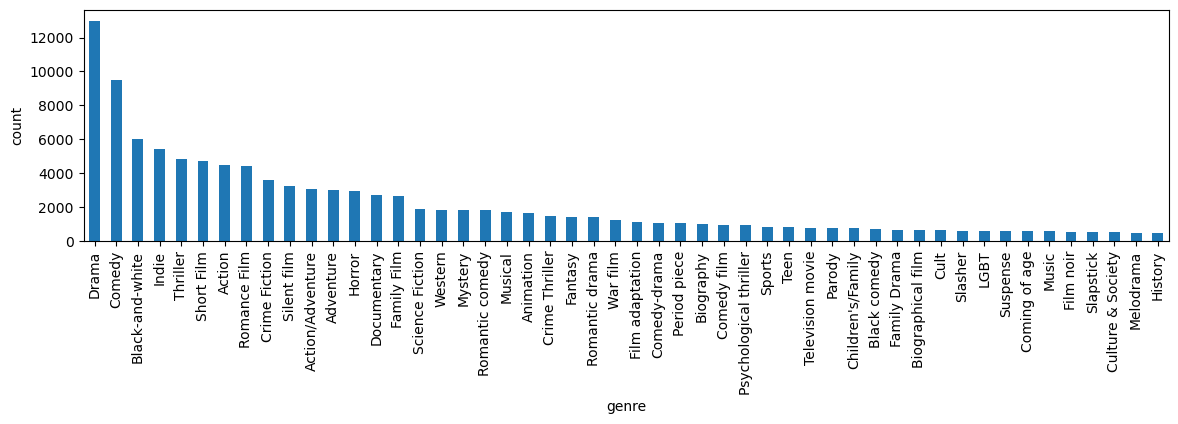

In [296]:
import ast

flattened = [genre for items in movies_df["Movie genres"] for genre in ast.literal_eval(items)]

genres = pd.Series(flattened).value_counts().head(50)  #.apply(get_genre)
plt.figure(figsize=(14,3))
plt.xlabel("genre")
plt.ylabel("count")
genres.plot(kind="bar")

<Axes: title={'center': 'Top 4 genre per year'}, xlabel='Movie release year'>

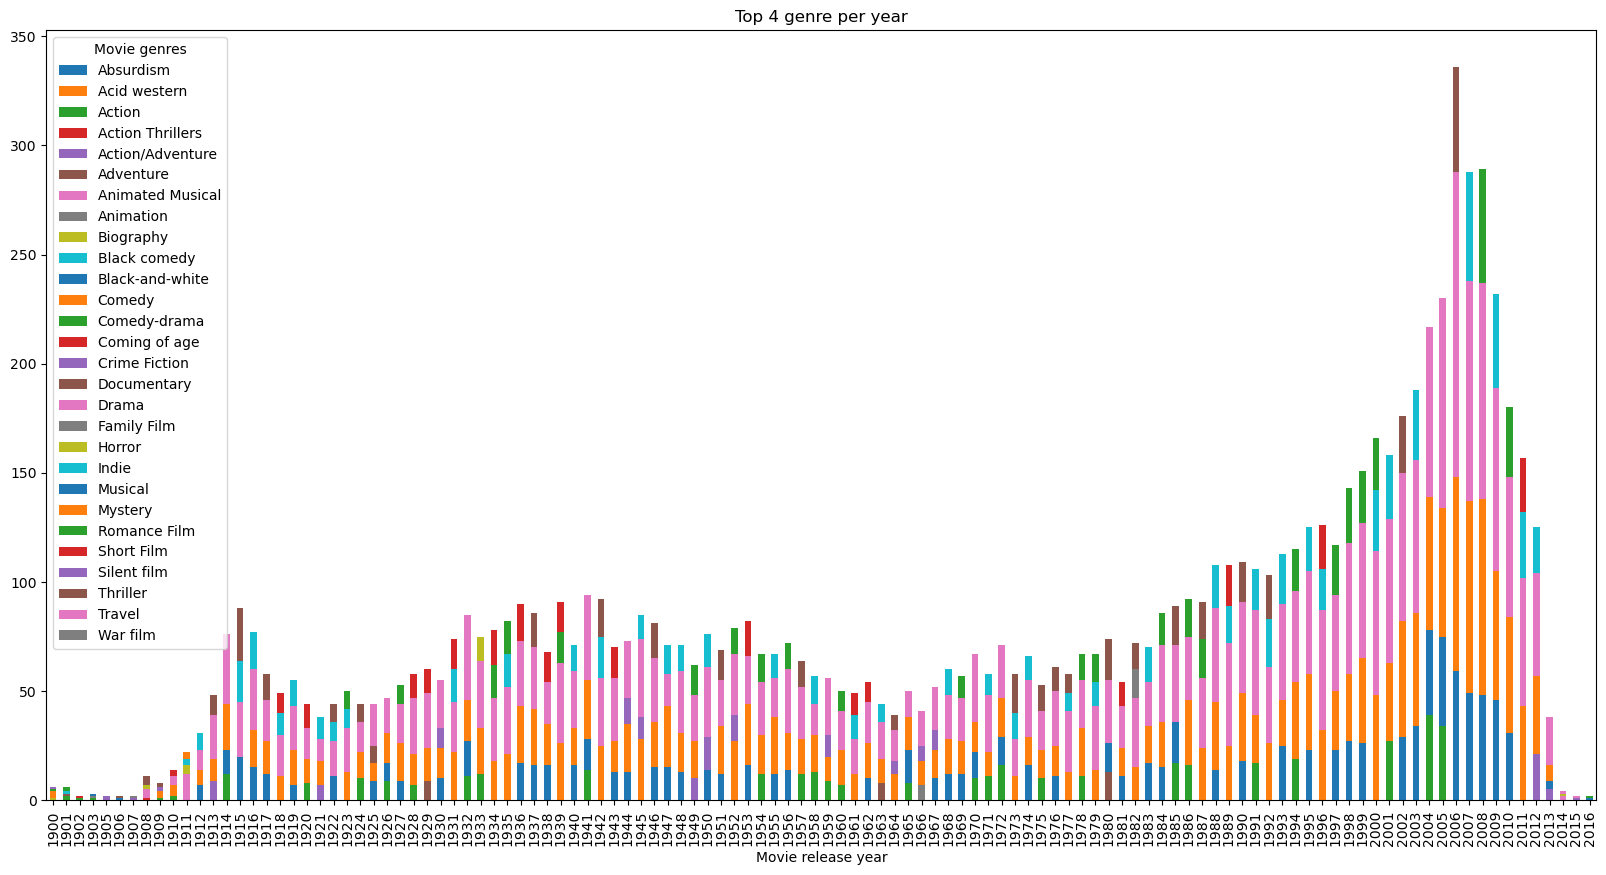

In [297]:
themes_counts_years = movies_df.copy(deep=True)
def get_year(string):
    try: return string.split("-")[0]
    except: return ""
themes_counts_years["Movie release year"] = themes_counts_years['Movie release date'].astype(int)
#genre_counts["Movie release date"].apply(get_year)

flattened = [genre for items in movies_df["Movie genres"] for genre in ast.literal_eval(items)]
genres = pd.Series(flattened)

themes_counts_years["Movie genres"] = genres

themes_counts_years = themes_counts_years.groupby(["Movie release year", "Movie genres"]).size().unstack(fill_value=0)

themes_counts_years.apply(lambda x: x.nlargest(4), axis=1).plot(kind="bar", stacked=True, figsize=(20, 10),
                                                         title="Top 4 genre per year")
#plt.xlim(1910,2011)

In [298]:
themes_counts_years.div(themes_counts_years.sum(axis=1), axis=0).plot(kind="bar", stacked=True, figsize=(20, 10),title="Normalized genre distribution per year")

<Axes: title={'center': 'Normalized genre distribution per year'}, xlabel='Movie release year'>

Error in callback <function flush_figures at 0x16727b2e0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
flattened = [genre for items in movies_df["Movie countries"] for genre in ast.literal_eval(items)]
countries = pd.Series(flattened).value_counts().head(50)
plt.figure(figsize=(14,3))
plt.xlabel("country")
plt.ylabel("log count")
plt.yscale("log")
countries.plot(kind="bar")

KeyError: 'Movie countries'

<Axes: xlabel='language', ylabel='log count'>

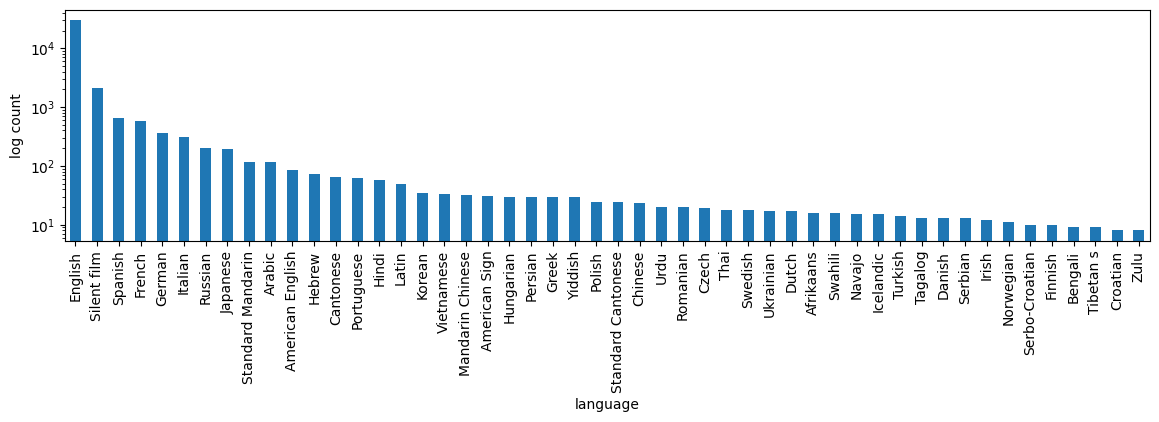

In [ ]:
flattened = [genre.replace("Language", "").replace("language", "").strip() for items in movies_df["Movie languages"] for genre in ast.literal_eval(items)]
languages = pd.Series(flattened).value_counts().head(50)
plt.figure(figsize=(14,3))
plt.xlabel("language")
plt.ylabel("log count")
plt.yscale("log")
languages.plot(kind="bar")

<Axes: title={'center': 'Movie box office revenue distribution'}, xlabel='Movie box office revenue', ylabel='frequency'>

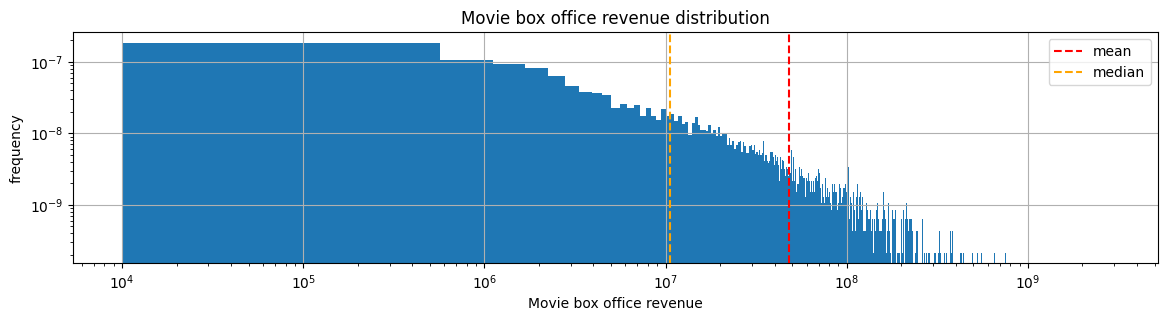

In [ ]:
movies_df_unprocessed = pd.read_csv("data/movie.metadata.tsv", sep="\t", header=None)
movies_df_unprocessed.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie box office revenue", "Movie runtime", "Movie languages (Freebase ID:name tuples)", "Movie countries (Freebase ID:name tuples)", "Movie genres (Freebase ID:name tuples)"]


plt.figure(figsize=(14,3))
plt.title("Movie box office revenue distribution")
plt.xlabel("Movie box office revenue")
plt.ylabel("frequency")
#plt.xlim(0, 100000000)
plt.xscale("log")
plt.yscale("log")
plt.axvline(movies_df_unprocessed["Movie box office revenue"].mean(), color="red", label="mean", linestyle="--")
plt.axvline(movies_df_unprocessed["Movie box office revenue"].median(), color="orange", label="median", linestyle="--")
plt.legend()
movies_df_unprocessed["Movie box office revenue"].hist(density=True, bins=5000)

In [ ]:
print("Top 50 films with the highest movie box office revenue")
movies_df_unprocessed.sort_values(ascending=False, by="Movie box office revenue")[["Movie name", "Movie release date", "Movie box office revenue"]].head(50)

Top 50 films with the highest movie box office revenue


Movie name Movie release date  \
23702                                             Avatar         2009-12-10   
22256                                            Titanic         1997-11-01   
28192                                       The Avengers         2012-04-11   
30278      Harry Potter and the Deathly Hallows – Part 2         2011-07-07   
18645                     Transformers: Dark of the Moon         2011-06-23   
80920      The Lord of the Rings: The Return of the King         2003-12-17   
54719                              The Dark Knight Rises         2012-07-16   
69586                                        Toy Story 3         2010-06-12   
14303        Pirates of the Caribbean: On Stranger Tides         2011-05-07   
50039            Star Wars Episode I: The Phantom Menace         1999-05-19   
9719                                 Alice in Wonderland         2010-03-05   
38158                                    The Dark Knight         2008-07-16   
71442           Harry Potter and the Philosopher's Stone         2001-11-16   
73532           Pirates of the Caribbean: At World's End         2007-05-19   
59574       Harry Potter and the Deathly Hallows: Part I         2010-11-17   
21432                                      The Lion King         1994-06-15   
17924          Harry Potter and the Order of the Phoenix         2007-06-28   
7358              Harry Potter and the Half-Blood Prince         2009-07-06   
8821               The Lord of the Rings: The Two Towers         2002-12-05   
13479                                       Finding Nemo         2003-05-30   
59393                                            Shrek 2         2004-05-15   
63097                                      Jurassic Park         1993-06-09   
10820                Harry Potter and the Goblet of Fire         2005-11-06   
32539                                       Spider-Man 3         2007-04-16   
38443                     Ice Age: Dawn of the Dinosaurs         2009-07-01   
41200            Harry Potter and the Chamber of Secrets         2002-11-03   
79973  The Lord of the Rings: The Fellowship of the Ring         2001-12-10   
63889                         Ice Age: Continental Drift         2012-07-13   
62303         Star Wars Episode III: Revenge of the Sith         2005-05-15   
24339                Transformers: Revenge of the Fallen         2009-06-19   
60260                                          Inception         2010-07-08   
3035                                          Spider-Man         2002-05-03   
78261                                   Independence Day         1996-06-25   
41589                                    Shrek the Third         2007-05-06   
41251           Harry Potter and the Prisoner of Azkaban         2004-06-04   
57552                         E.T. the Extra-Terrestrial         1982-05-26   
33405  Indiana Jones and the Kingdom of the Crystal S...         2008-05-22   
14453                                       Spider-Man 2         2004-06-25   
80800                   Star Wars Episode IV: A New Hope         1977-05-25   
53055                                               2012         2009-11-11   
23863                                  The Da Vinci Code         2006-05-17   
49438                                Shrek Forever After         2010-04-21   
63446                             The Amazing Spider-Man         2012-06-13   
35156                                The Matrix Reloaded         2003-05-07   
65511                                                 Up         2009-05-13   
15249                 Madagascar 3: Europe's Most Wanted         2012-05-18   
62829                                           New Moon         2009-11-16   
49114                                       Transformers         2007-06-12   
9912           The Twilight Saga: Breaking Dawn - Part 1         2011-11-16   
40199                                            Eclipse         2010-06-24   

       Movie box